# <font color=darkcyan> **Projet: Prédiction de la consommation d'énergie** </font>

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna

### Table des matières  
1. [Analyse descriptive des données](#1-analyse-descriptive-des-donnees)  
2. [Séparation des données, preprocessing](#2-separation-des-données-preprocessing)  
3. [Problème mathématique général](#3-probleme-mathématique-général)  
4. [Régression linéaire](#4-regression-linéaire)  
   4.1 [Régression linéaire multivariée à rang plein](#41-regression-linéaire-multivariee-à-rang-plein)  
   4.2 [Régression linéaire avec pénalisation Ridge, Lasso](#42-regression-lineaire-avec-penalisation-ridge-lasso)  
   4.2.1 [Validation croisée](#421-validation-croisee)  
   4.3 [Régression Elastic-Net](#43-regression-elastic-net)  
5. [Régression à base de noyaux](#5-regression-à-base-de-noyaux)  
6. [Réseau de neurones dense](#6-reseau-de-neurones-dense)  
7. [Modèles à base d'arbres de décision](#7-modeles-à-base-darbres-de-décision)  
   7.1 [Forêts aléatoires](#71-forets-aleatoires)  
   7.2 [Gradient Boosting Regressor](#72-gradient-boosting-regressor)  
8. [Améliorations possibles](#8-ameliorations-possibles)  
   8.1 [Implémentation sans rv1 et rv2](#81-implementation-sans-rv1-et-rv2)  
   8.2 [Feature engineering temporel](#82-feature-engineering-temporel)  
   8.2.1 [Random Forest avec nouvelles features temporelles](#821-random-forest-avec-nouvelles-features-temporelles)  
   8.2.1.1 [Optimisation avec Optuna](#8211-optimisation-avec-optuna)  
   8.2.2 [Gradient boosting avec nouvelles features temporelles](#822-gradient-boosting-avec-nouvelles-features-temporelles)  
   8.2.2.1 [Optimisation avec Optuna](#8221-optimisation-avec-optuna)  
   8.2.3 [Réseau de neurones avec nouvelles features temporelles](#823-reseau-de-neurones-avec-nouvelles-features-temporelles)  
   8.3 [Encodage cyclique des variables temporelles](#83-encodage-cyclique-des-variables-temporelles)  
   8.3.1 [Random Forest avec encodage cyclique](#831-random-forest-avec-encodage-cyclique)  
   8.3.2 [Réseau de neurones avec encodage cyclique](#832-reseau-de-neurones-avec-encodage-cyclique)  
9. [Analyse des résidus](#9-analyse-des-residus)  
    9.1 [Régressions linéaires](#91-regressions-linéaires)  
    9.2 [Réseau de neurones dense](#92-reseau-de-neurones-dense)  
    9.3 [Gradient Boosting](#93-gradient-boosting)  
    9.4 [Random Forest](#94-random-forest)  
    9.5 [Random Forest avec Optuna](#95-random-forest-avec-optuna)  
    9.6 [En somme...](#96-en-somme)  
10. [Conclusion](#10-conclusion)  
11. [Annexe : Interprétabilité avec SHAP](#11-annexe--interpretabilite-avec-shap)  

# <font color=darkcyan> 1. Analyse descriptive des données</font>

Commençons par une analyse descriptive du dataset afin de bien comprendre les caractéristiques des données avant toute modélisation.

In [12]:
# Chargement des données
df = pd.read_csv('energydata_complete.csv')

In [56]:
# Aperçu des 5 premières lignes
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [57]:
# Infos sur les types de colonnes et les valeurs manquantes
print("\nInformations sur le dataset :")
df.info()


Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19

In [59]:
# Vérifions s'il y a des valeurs manquantes
print("\nValeurs manquantes :")
df.isnull().sum()


Valeurs manquantes :


date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [58]:
# Statistiques descriptives
print("\nStatistiques descriptives :")
df.describe()


Statistiques descriptives :


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


Le dataset contient 19735 observations et 29 variables, dont une que nous n'allons pas traiter dans un premier temps (la date)

La variable cible (output) **Appliances** a une moyenne d'environ 97.7 kWh, avec un maximum à 1080 kWh.

Les variables de température (T1 à T9, T_out) varient entre 15°C et 26°C.

Pas de valeurs manquantes détectées.

Les colonnes `rv1` et `rv2` semblent peu informatives (même distribution), ce qui est en accord avec l'article.

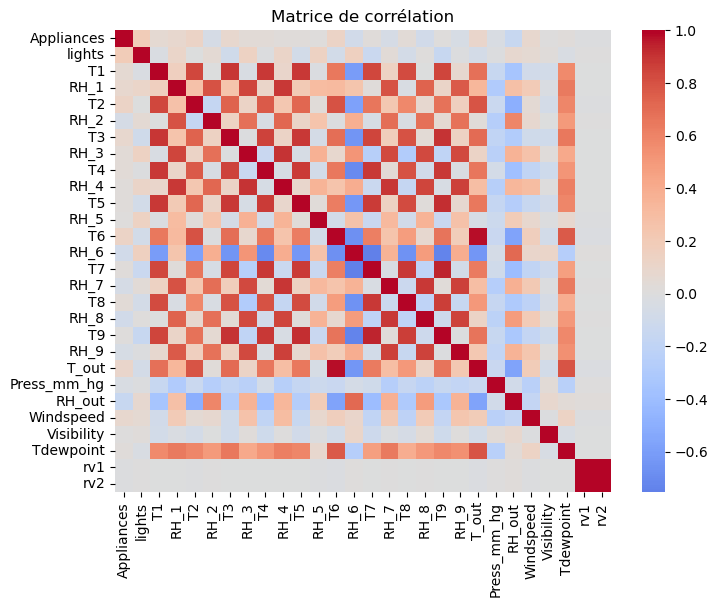

In [61]:
# Exclusion la colonne 'date' car non-numérique
df_numeric = df.drop(columns=['date'])

# Matrice de corrélation
plt.figure(figsize=(8,6))
sns.heatmap(df_numeric.corr(), cmap='coolwarm', center=0)
plt.title("Matrice de corrélation")
plt.show()

In [61]:
# Corrélations avec la variable cible
correlation_with_target = df_numeric.corr()['Appliances'].sort_values(ascending=False)
print(correlation_with_target)

Appliances     1.000000
lights         0.197278
T2             0.120073
T6             0.117638
T_out          0.099155
Windspeed      0.087122
RH_1           0.086031
T3             0.085060
T1             0.055447
T4             0.040281
T8             0.039572
RH_3           0.036292
T7             0.025801
T5             0.019760
RH_4           0.016965
Tdewpoint      0.015353
T9             0.010010
RH_5           0.006955
Visibility     0.000230
rv1           -0.011145
rv2           -0.011145
Press_mm_hg   -0.034885
RH_9          -0.051462
RH_7          -0.055642
RH_2          -0.060465
RH_6          -0.083178
RH_8          -0.094039
RH_out        -0.152282
Name: Appliances, dtype: float64


La matrice de corrélation ci-dessus nous amène à observer les points suivant concernant la variable cible Appliances (consommation énergétique):

**Lights** : Corrélation positive modérée (**+0.197**). C'est assez intuitif : plus les lumières sont utilisées, plus la consommation d'énergie est élevée.
  
**Températures** (`T2`, `T6`, `T_out`) : Corrélations positives modérées (**+0.12**, **+0.11**, **+0.10** respectivement). Ces variables influencent probablement la consommation par le biais du chauffage ou de la climatisation.
  
**Windspeed** : Corrélation légèrement positive (**+0.087**). Une explication possible est que le vent pourrait affecter la température ressentie, influençant ainsi le besoin de chauffage/climatisation.
  
**Humidité extérieure** (`RH_out`) : Corrélation négative (**-0.152**) avec la consommation. Cela peut s'expliquer par le fait que des conditions très sèches ou très humides modifient la demande énergétique.
  
**Variables `rv1` et `rv2`** : Ces deux variables présentent une corrélation quasi nulle avec la variable cible. Elles semblent redondantes ou peu informatives et pourraient potentiellement être supprimées lors de la phase de sélection de variables.



Pour résumer, aucune variable individuelle n'a de forte corrélation avec la consommation énergétique. Cela suggère que la consommation dépend d'une combinaison plus complexe de plusieurs facteurs (température intérieure/extérieure, usage des lumières, conditions météorologiques, etc.) et justifie le recours à des modèles multivariés capables de capturer ces relations.
Par ailleurs, certaines variables comme `rv1` et `rv2` pourraient potentiellement être supprimées lors d'une future sélection de variables car elles ont une corrélation quasi nulle avec la variable cible `Appliances`  et peuvent ajouter du bruit au modèle.

Dans un premier temps, nous allons supprimer la variable temporelle `date` pour simplifier le problème et implémenter les méthodes vues en cours, mais nous envisagerons de l'exploiter plus tard pour améliorer nos performances.

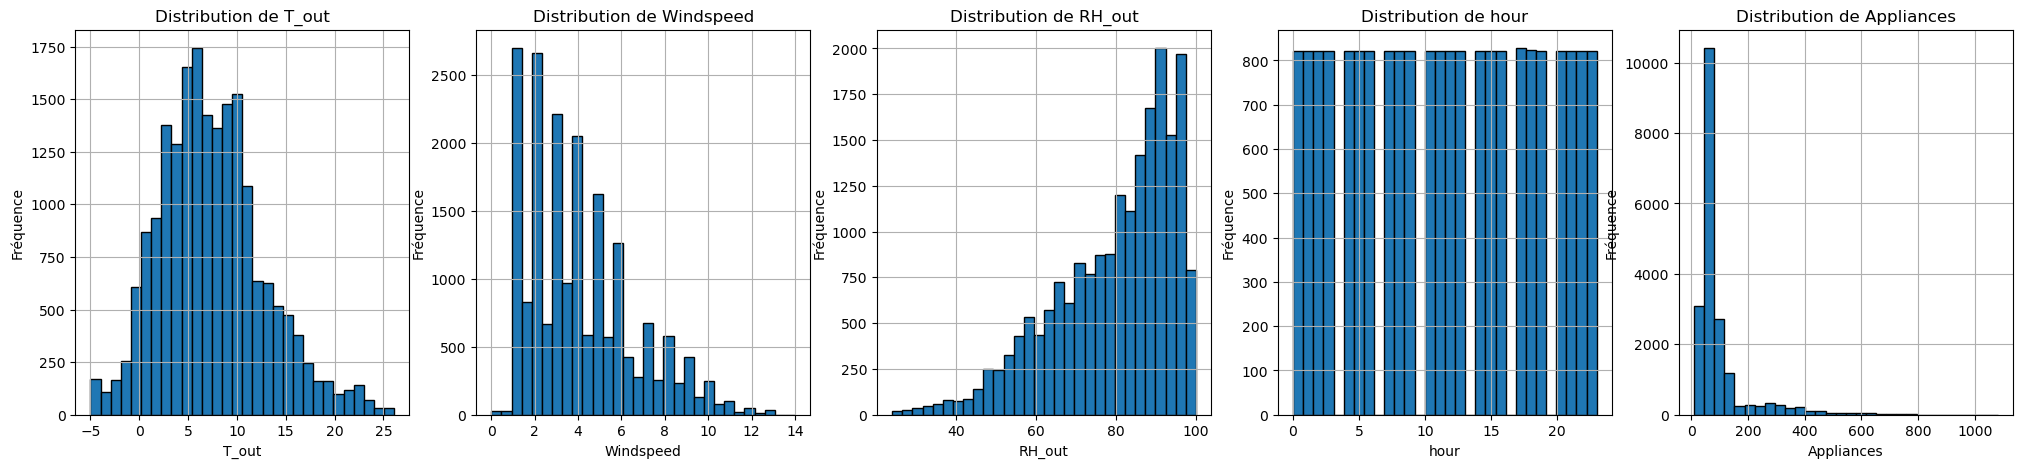

In [62]:
# Histogrammes simples pour quelques variables clés

df['date'] = pd.to_datetime(df['date']) 
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month

variables = ['T_out', 'Windspeed', 'RH_out', 'hour', 'Appliances']

plt.figure(figsize=(25,5))

for i, var in enumerate(variables, 1):  
    plt.subplot(1, 5, i)  
    plt.hist(df[var], bins=30, edgecolor='black')
    plt.title(f"Distribution de {var}")
    plt.xlabel(var)
    plt.ylabel("Fréquence")
    plt.grid(True)


**T_out (Température extérieure)**: La distribution est asymétrique, avec un pic entre **10 et 15°C**.
Peu de valeurs en dessous de 0°C ou au-dessus de 25°C : le dataset reflète un climat tempéré.

**Windspeed**: La majorité des valeurs sont concentrées sous **5 m/s**.
Distribution très biaisée vers les faibles valeurs, avec peu de cas de vent fort.
L’impact du vent pourrait donc être limité dans les prédictions.

**RH_out (Humidité extérieure)**: Répartition assez étendue, avec une concentration autour de **50–80 %**.

**hour (Heure de la journée)**: Distribution uniforme entre 0 et 23 → toutes les heures sont représentées.
Cela permettra au modèle d’apprendre des **patterns temporels**, comme les pics de consommation le matin ou le soir.

**Appliances (Consommation énergétique)**: La variable cible est très asymétrique : la majorité des valeurs sont inférieures à 200, avec quelques valeurs extrêmes supérieures à 1000.
Cette distribution skewed indique que le modèle devra gérer des cas fréquents “normaux” et quelques cas rares à forte consommation.


Cette visualisation nous permet d'un peu mieux comprendre la nature des données, ainsi que d’anticiper certains biais d’apprentissage et de confirmer que certaines variables, comme ``hour`` ou ``RH_out``, présentent une bonne variabilité. Cela renforce la pertinence des choix faits lors du feature engineering plus tard dans ce projet!

In [63]:
# Extraction de variables temporelles
df['hour'] = df['date'].dt.hour
df['dayofweek'] = df['date'].dt.dayofweek

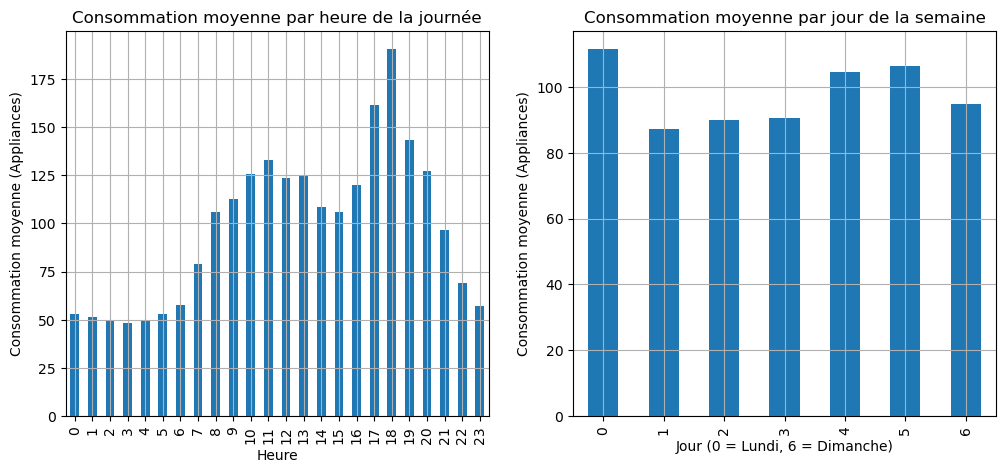

In [64]:
plt.figure(figsize=(12,5))

# Histogramme de la consommation en fonction de l'heure
plt.subplot(1, 2, 1)
df.groupby('hour')['Appliances'].mean().plot(kind='bar')
plt.title("Consommation moyenne par heure de la journée")
plt.xlabel("Heure")
plt.ylabel("Consommation moyenne (Appliances)")
plt.grid(True)

# Histogramme de la consommation en fonction du jour de la semaine
plt.subplot(1, 2, 2)
df.groupby('dayofweek')['Appliances'].mean().plot(kind='bar')
plt.title("Consommation moyenne par jour de la semaine")
plt.xlabel("Jour (0 = Lundi, 6 = Dimanche)")
plt.ylabel("Consommation moyenne (Appliances)")
plt.grid(True)


Ici, on regarde la consommation moyenne:

- **Par heure** : On observe deux pics clairs de consommation : le matin (vers 7–9h) et surtout en fin de journée (entre 18h et 21h). Ces résultats sont cohérents avec les rythmes de vie d'une majorité de la population (chauffage, lumières, cuisine...).
- **Par jour de la semaine** : La consommation est légèrement plus élevée les jours de week-end, notamment le dimanche. Cela reflète une présence accrue au domicile ces jours-là, que l'on pouvait également anticiper.

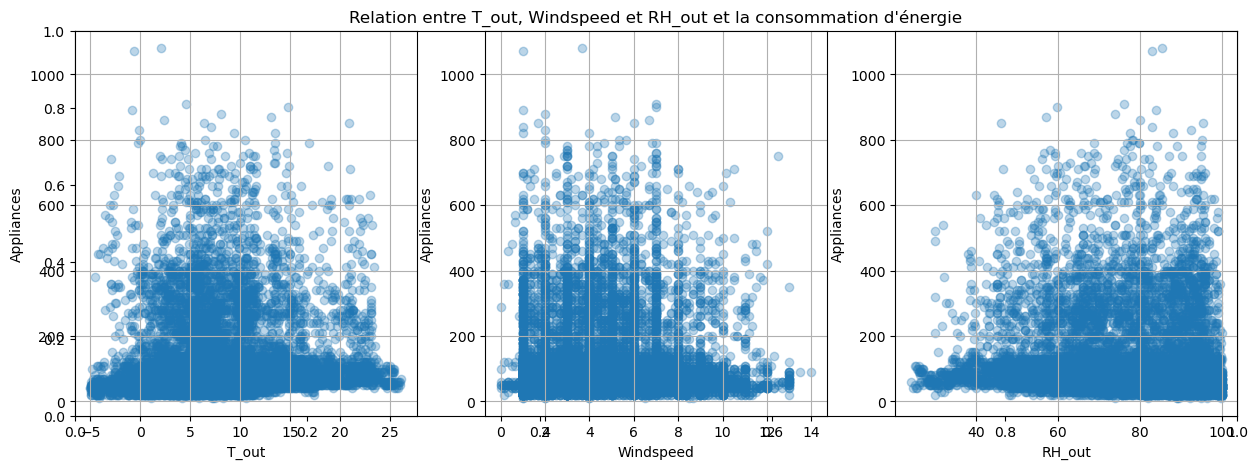

In [26]:
# Scatter plots pour visualiser la relation entre variables explicatives et l'output
comparaisons = ['T_out', 'Windspeed', 'RH_out']

plt.figure(figsize=(15, 5)) 
plt.title(f"Relation entre T_out, Windspeed et RH_out et la consommation d'énergie")

for i, var in enumerate(comparaisons, start=1):
    plt.subplot(1, 3, i) 
    plt.scatter(df[var], df['Appliances'], alpha=0.3)
    plt.xlabel(var)
    plt.ylabel("Appliances")
    plt.grid(True)

**T_out vs Appliances** : Tendance très légèrement décroissante : plus il fait chaud dehors, moins on consomme (chauffage en moins). Relation faible mais plausible.

**Windspeed vs Appliances** : Pas de corrélation claire, mais quelques points de forte consommation associés à un vent faible.

**RH_out vs Appliances** : Très légère tendance croissante : une humidité élevée pourrait être liée à plus de chauffage ou déshumidification.



In [ ]:
# Analyse croisée par sous-groupe de données
# Création d’un sous-groupe jour vs nuit
conditions = [df['hour'].between(6, 18), ~df['hour'].between(6, 18)]
group_labels = ['Jour', 'Nuit']
df['période'] = np.select(conditions, group_labels)

In [ ]:
# Création d’un sous-groupe température élevée vs basse
median_temp = df['T_out'].median()
df['groupe_temp'] = ['Froid' if t < median_temp else 'Chaud' for t in df['T_out']]

In [ ]:
# Moyenne de consommation selon les sous-groupes
agg = df.groupby(['période', 'groupe_temp'])['Appliances'].agg(['mean', 'std']).reset_index()
print("Consommation moyenne par sous-groupe (période et température) :")
print(agg)

Consommation moyenne par sous-groupe (période et température) :
  période groupe_temp        mean         std
0    Jour       Chaud  122.744186  123.774649
1    Jour       Froid  114.406163  123.413890
2    Nuit       Chaud   74.942916   55.153650
3    Nuit       Froid   70.478026   64.259833


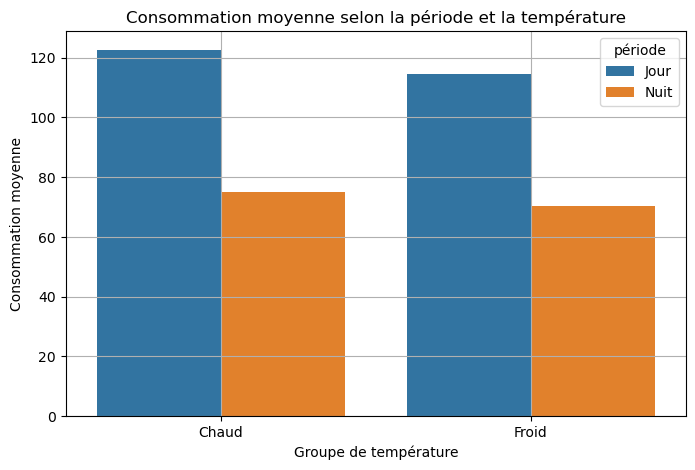

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=agg, x='groupe_temp', y='mean', hue='période')
plt.title("Consommation moyenne selon la période et la température")
plt.xlabel("Groupe de température")
plt.ylabel("Consommation moyenne")
plt.grid(True)
plt.show()

Ici, on a croisé 2 dimensions importantes du data set:
- la période de la journée (jour, nuit)
- Le niveau de température extérieure (chaud vs froid, basé sur la médiane)

Contrairement à ce que l’on pourrait attendre au premier abord, la consommation est légèrement plus élevée lorsqu’il fait chaud, aussi bien le jour que la nuit.

Il y a plusieurs explications pour ça: les jours chauds peuvent correspondre à des périodes de forte occupation de la maison (vacances d'été par ex), l'effet de climatisation/ventilation...

Tout cela suggère que la température extérieure n’est pas un indicateur direct de baisse ou de hausse de consommation, mais qu’il faut tenir compte de bien d'autres facteurs, d'où l'utilité d'implémenter les modèles que nous allons implémenter par la suite.

# <font color=darkcyan> 2. Séparation des données, preprocessing </font>

Afin d’évaluer les performances des modèles de manière fiable, nous séparons le dataset en deux sous-ensembles :

**Données d’entraînement** (*train set*) : utilisées pour entraîner les modèles.

**Données de validation** (*test set*) : utilisées pour évaluer la capacité du modèle à généraliser sur de nouvelles données.

Nous utilisons la fonction `train_test_split` de la librairie `scikit-learn` avec une proportion de $80\%$ pour l'entraînement et $20\%$ pour le test, en fixant un paramètre `random_state` afin d'assurer la reproductibilité des résultats.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
# Variables explicatives et cible
X = df.iloc[:, 2:]
y = df.iloc[:, 1]

In [16]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
n, d = X_train.shape

In [18]:
print("Taille du jeu d'entraînement :", X_train.shape)
print("Taille du jeu de test :", X_test.shape)

Taille du jeu d'entraînement : (15788, 27)
Taille du jeu de test : (3947, 27)


# <font color=darkcyan> 3. Problème mathématique général </font>

Dans un cadre général de régression, nous disposons de données $D_n = \left\{(X_i,Y_i)\right\}_{1\le i\le n}$ où $(X_i,Y_i)_{1\le i\le n}$ sont iid, $X_i\in\mathbb{R}^d$ and $Y_i\in\mathbb{R}$.
Pour une famille de fonctions $F$ donnée, le but est ici de modéliser la relation entre la variable cible $(Y_i)$ et les différentes variables explicatives $(X_i)$ par une fonction $f\in F$. Cette fonction est estimée en minimisant le risque empirique, c'est à dire de résoudre le problème d'optimisation suivant: 
$$
\widehat f_n\in  \mathrm{argmin}_{f\in\ F}\,\left(n^{-1} \sum_{i=1} ^n (f(X_i) - Y_i)^2 \right)\,.
$$


# <font color=darkcyan> 4. Régression linéaire </font>

Dans un cadre de régression linéaire correctement spécifié, nous allons supposer que f est une fonction linéaire et que le modèle est ainsi de la forme:
$$Y = X \theta_{\star} + \varepsilon\,.$$
où :
 - $Y\in\mathbb{R}^n$ le vecteur aléatoire d'observations
 - $X\in\mathbb{R}^{n\times d}$ la matrice d'inputs/features
 - $\varepsilon\ \sim \mathcal{N}(0,\,\sigma_{\star}^{2}I_n)$ où $\sigma_{\star}$ est connu
 - $\theta_{\star}\in\mathbb{R}^d$ le vecteur de coefficients inconnu que l'on cherche à déterminer.

## <font color=darkcyan> 4.1 Regression linaire multivariée à rang plein </font>

Etant donné que nous disposons de beaucoup plus d'observations que de variables explicatives, il semble pertinent de supposer que X est une matrice de rang plein dans un premier temps (ie $X^\top X$ est inversible). 

L'estimateur des moindres carrés $\theta_{\star}$ est défini comme solution de:

$$
\widehat \theta_n\in  \mathrm{argmin}_{\theta\in\mathbb{R}^d}\,\left( \|Y - X\theta\|_2^2 \right)\,.
$$

In [65]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [291]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [292]:
y_pred_lr = linreg.predict(X_test)

Text(0.5, 1.0, 'Predictions compared to actual test values')

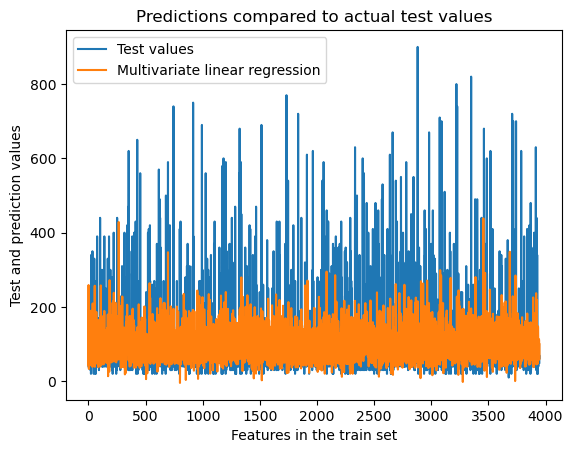

In [293]:
plt.figure()
plt.plot(y_test.values)
plt.plot(y_pred_lr)
plt.xlabel('Features in the train set')
plt.ylabel('Test and prediction values')
plt.legend(labels=('Test values','Multivariate linear regression'))
plt.title('Predictions compared to actual test values')

In [294]:
mse = mean_squared_error(y_test, y_pred_lr)
print('MSE =', mse)

MSE = 8312.848891755486


Sans grande surprise, ce modèle est plutôt mauvais, ce qui peut être expliqué par une variété de raisons:
- l'hypothèse que $X^t X$ est inversible est très forte et souvent pas vérifiée.
- nos données ne suivent tout simplement pas un modèle linéaire.

## <font color=darkcyan> 4.2 Regression linéaire avec pénalisation Ridge, Lasso </font>

Une manière d'améliorer la prédiction est d'ajouter un pénalisation Ridge (L2) ou Lasso (L1), c'est à dire introduire un hyperparamètre $\alpha>0$. L'estimateur des moindres carrés pénalisé est alors défini par: 

$$
\widehat \theta_{n,\lambda}^{Ridge}\in  \mathrm{argmin}_{\theta\in\mathbb{R}^d}\,\left( \|Y - X\theta\|_2^2 + \alpha \|\theta\|_2^2\right) pour Ridge
$$


$$
\widehat \theta_{n,\lambda}^{Lasso}\in  \mathrm{argmin}_{\theta\in\mathbb{R}^d}\,\left( \|Y - X\theta\|_2^2 + \alpha \|\theta\|_1\right) pour Lasso
$$

On a alors plus le problème de $X^t X$ qui n'est pas inversible.

Cherchons la meilleure valeur de alpha (celle qui minimise la MSE) pour Lasso et Ridge en performant une grid search avec validation croisée intégrée en utilisant ``GridSearchCV``.

In [73]:
from sklearn.model_selection import GridSearchCV

In [92]:
model = Ridge()
param_grid={"alpha": np.logspace(-2, 6, num=200)}
gscv_r = GridSearchCV(model, param_grid, cv=5)
gscv_r.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-02, 1.09698580e-02, 1.20337784e-02, 1.32008840e-02,
       1.44811823e-02, 1.58856513e-02, 1.74263339e-02, 1.91164408e-02,
       2.09704640e-02, 2.30043012e-02, 2.52353917e-02, 2.76828663e-02,
       3.03677112e-02, 3.33129479e-02, 3.65438307e-02, 4.00880633e-02,
       4.39760361e-02, 4.82410870e-02, 5.29197874e-02, 5....
       1.18953407e+05, 1.30490198e+05, 1.43145894e+05, 1.57029012e+05,
       1.72258597e+05, 1.88965234e+05, 2.07292178e+05, 2.27396575e+05,
       2.49450814e+05, 2.73644000e+05, 3.00183581e+05, 3.29297126e+05,
       3.61234270e+05, 3.96268864e+05, 4.34701316e+05, 4.76861170e+05,
       5.23109931e+05, 5.73844165e+05, 6.29498899e+05, 6.90551352e+05,
       7.57525026e+05, 8.30994195e+05, 9.11588830e+05, 1.00000000e+06])})

In [93]:
y_pred_r = gscv_r.predict(X_test)
mse_r = mean_squared_error(y_test, y_pred_r)
print(f'Meilleurs paramètres pour Ridge = {gscv_r.best_params_}, MSE = {mse_r}')
print(f'Meilleur score pour Ridge = {gscv_r.best_score_}')

Meilleurs paramètres pour Ridge = {'alpha': 4.102658105827195}, MSE = 8312.01601846889
Meilleur score pour Ridge = 0.1601387311769923


In [85]:
model = Lasso()
param_grid={"alpha": np.logspace(-2, 6, num=200)}
gscv = GridSearchCV(model, param_grid, cv=5)
gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-02, 1.09698580e-02, 1.20337784e-02, 1.32008840e-02,
       1.44811823e-02, 1.58856513e-02, 1.74263339e-02, 1.91164408e-02,
       2.09704640e-02, 2.30043012e-02, 2.52353917e-02, 2.76828663e-02,
       3.03677112e-02, 3.33129479e-02, 3.65438307e-02, 4.00880633e-02,
       4.39760361e-02, 4.82410870e-02, 5.29197874e-02, 5....
       1.18953407e+05, 1.30490198e+05, 1.43145894e+05, 1.57029012e+05,
       1.72258597e+05, 1.88965234e+05, 2.07292178e+05, 2.27396575e+05,
       2.49450814e+05, 2.73644000e+05, 3.00183581e+05, 3.29297126e+05,
       3.61234270e+05, 3.96268864e+05, 4.34701316e+05, 4.76861170e+05,
       5.23109931e+05, 5.73844165e+05, 6.29498899e+05, 6.90551352e+05,
       7.57525026e+05, 8.30994195e+05, 9.11588830e+05, 1.00000000e+06])})

In [86]:
y_pred_l = gscv.predict(X_test)
mse_l = mean_squared_error(y_test, y_pred_l)
print(f'Meilleurs paramètres pour Lasso = {gscv.best_params_}, MSE = {mse_l}')
print(f'Meilleur score pour Lasso = {gscv.best_score_}')

Meilleurs paramètres pour Lasso = {'alpha': 0.015885651294280528}, MSE = 8311.550066254691
Meilleur score pour Lasso = 0.16016060764240375


In [95]:
best_model_l = gscv.best_estimator_
best_model_r = gscv_r.best_estimator_

In [89]:
def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} - MSE : {mse:.2f}, R² : {r2:.2f}")

evaluate_model("Régression Linéaire", y_test, y_pred_lr)
evaluate_model("Ridge Regression", y_test, y_pred_r)
evaluate_model("Lasso Regression", y_test, y_pred_l)

Régression Linéaire - MSE : 8312.85, R² : 0.17
Ridge Regression - MSE : 8311.55, R² : 0.17
Lasso Regression - MSE : 8311.55, R² : 0.17


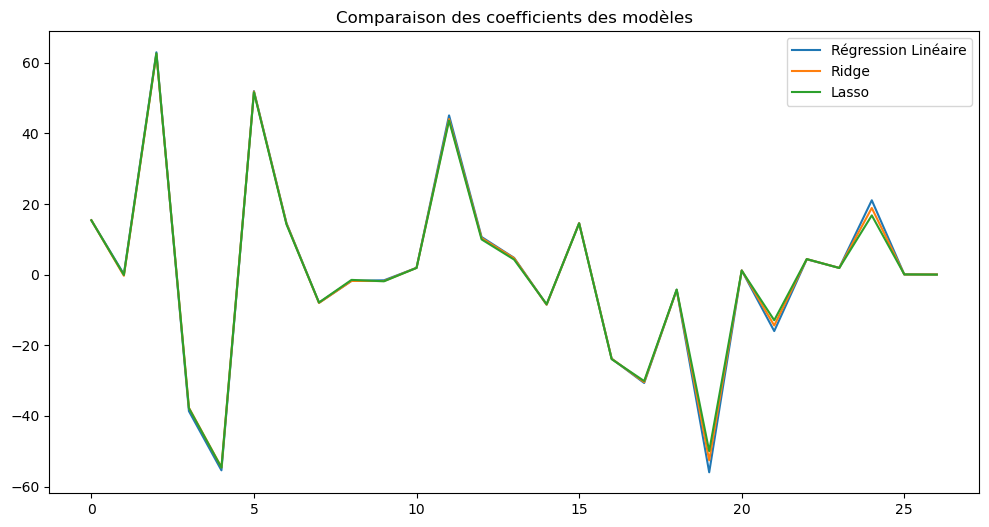

In [97]:
# Visualisation des coefficients
plt.figure(figsize=(12,6))
plt.plot(linreg.coef_, label='Régression Linéaire')
plt.plot(best_model_r.coef_, label='Ridge')
plt.plot(best_model_l.coef_, label='Lasso')
plt.legend()
plt.title("Comparaison des coefficients des modèles")
plt.show()

En termes de MSE et R², les performances des modèles Lasso et Ridge sont très similaires: on a une légère amélioration par rapport à la régression linéaire simple, mais rien d'incroyable.

Le fait que le meilleur $\alpha$ pour Lasso soit faible (0.02) indique qu'une régularisation légère suffit à améliorer la stabilité tout en gardant les coefficients significatifs.

Le modèle Ridge atteint également de bonnes performances avec $\alpha = 0.16$, ce qui démontre qu'une pénalisation modérée permet de contrôler les coefficients sans dégrader la capacité prédictive.

Le choix entre Ridge et Lasso dépend du compromis souhaité entre robustesse (Ridge) et simplification du modèle via sélection de variables (Lasso). Nous allons illustrer les particularités de Ridge et Lasso ici.

In [80]:
p = 200
alphas = np.logspace(-2, 6, p)
mse_ridge = []
coefficients_ridge = []
zeros_ridge = []
mse_lasso = []
zeros_lasso = []
coefficients_lasso = []

for i in range(p):
    
    ridge = Ridge(alphas[i])
    ridge.fit(X_train, y_train)
    y_pred_r = ridge.predict(X_test)
    coeff_r = ridge.coef_
    zero_r = np.sum(coeff_r == 0)
    zeros_ridge.append(zero_r)
    coefficients_ridge.append(coeff_r)
    mse_ridge.append(mean_squared_error(y_test, y_pred_r))
    
    lasso = Lasso(alphas[i])
    lasso.fit(X_train, y_train)
    y_pred_l = lasso.predict(X_test)
    coeff_l = lasso.coef_
    zero_l = np.sum(coeff_l == 0)
    zeros_lasso.append(zero_l)
    coefficients_lasso.append(coeff_l)
    mse_lasso.append(mean_squared_error(y_test, y_pred_l))

Text(0.5, 1.0, 'Pénalisation Lasso')

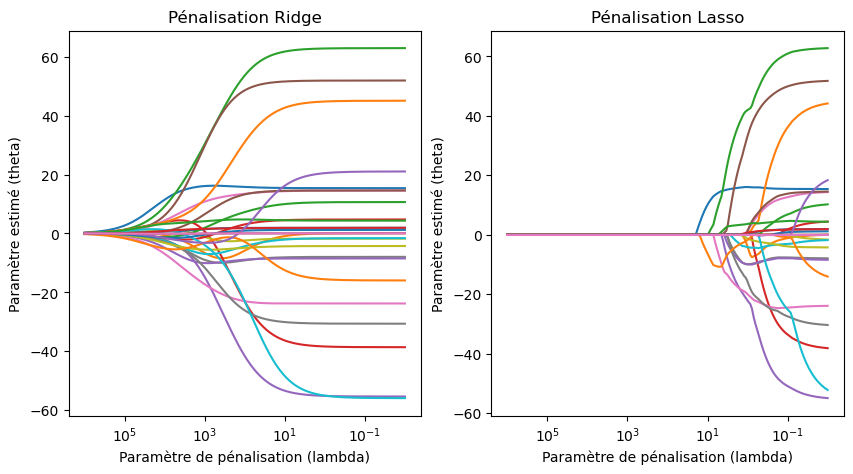

In [81]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(alphas, coefficients_ridge)
ax = plt.gca()
plt.xlabel("Paramètre de pénalisation (lambda)")
plt.ylabel("Paramètre estimé (theta)")
plt.xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.title("Pénalisation Ridge")

plt.subplot(1, 2, 2)
plt.plot(alphas, coefficients_lasso)
ax = plt.gca()
plt.xlabel("Paramètre de pénalisation (lambda)")
plt.ylabel("Paramètre estimé (theta)")
plt.xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.title("Pénalisation Lasso")

Lorsque lambda est très grand, il y a une forte pénalisation, ce qui fait converger les coefficients vers zéro, d'autant plus dans le cas Lasso, où les coefficients prennent tous la valeur 0 à partir d'une certaine valeur de alpha (de l'ordre de 10). Cela simplifie le modèle, mais au prix d’une perte d’information et d’un potentiel sous-ajustement des données.

Lorsque lambda est très faible cependant la régularisation est quasi inexistante. Les coefficients prennent alors des valeurs plus grandes et varient davantage, ce qui permet une plus grande flexibilité. Bémol: cela rend le modèle plus sensible au bruit des données d’entraînement.

D'où l'utilité de la grid search et validation croisée pour sélectionner le lambda qui offre le meilleur compromis biais variance. 

(0.003981071705534973,
 2511886.4315095823,
 8225.945870676533,
 10093.607237253203)

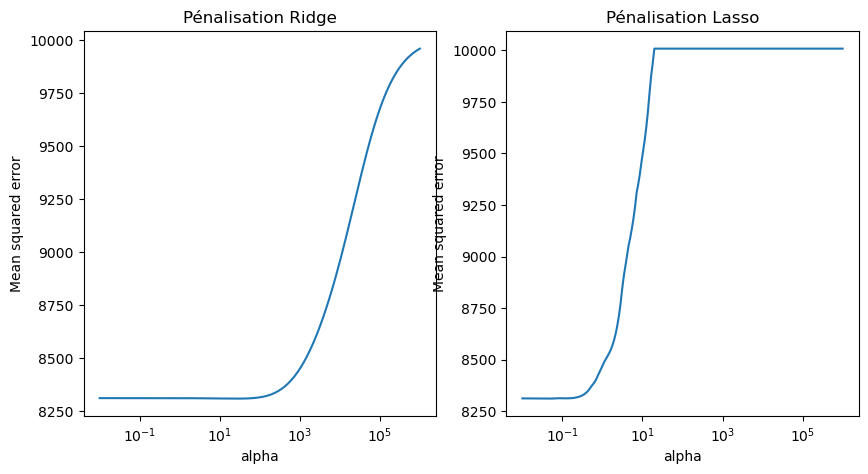

In [82]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(alphas, mse_ridge)
plt.xscale('log')
plt.xlabel("alpha")
plt.ylabel('Mean squared error')
plt.title("Pénalisation Ridge")
plt.axis("tight")

plt.subplot(1, 2, 2)
plt.plot(alphas, mse_lasso)
plt.xscale('log')
plt.xlabel("alpha")
plt.ylabel('Mean squared error')
plt.title("Pénalisation Lasso")
plt.axis("tight")

On retrouve bien un hyperparamètre alpha idéal avant 10^1 pour Ridge et aux alentours de 10^-1 pour Lasso.

(0.003981071705534973, 2511886.4315095823, -1.35, 28.35)

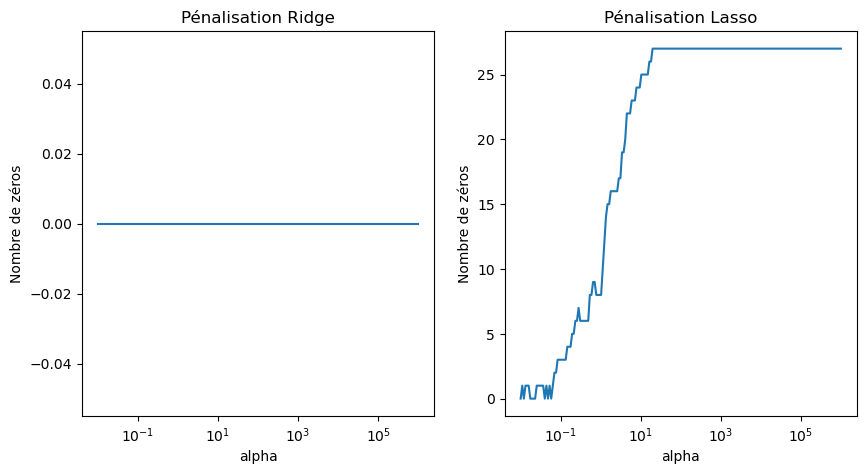

In [83]:
plt.figure(1,figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(alphas, zeros_ridge)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("Nombre de zéros")
plt.title("Pénalisation Ridge")
plt.axis("tight")

plt.subplot(1, 2, 2)
plt.plot(alphas, zeros_lasso)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("Nombre de zéros")
plt.title("Pénalisation Lasso")
plt.axis("tight")

Ce graphe illustre bien l'effet de sélection de variable de Lasso mentionné plus haut: alors que Ridge ne met aucun coefficient du paramètre à 0, Lasso en met de plus en plus avec l'augmentation de l'hyperparamètre alpha. Ce comportement peut être intéressant pour simplifier le modèle et interpréter les variables les plus influentes. Ridge contrôle la taille des coefficients, ce qui permet de réduire la variance du modèle. On observe que les coefficients sont globalement plus faibles que dans la régression linéaire simple. Le modèle Ridge est donc plus robuste face à des variables redondantes ou fortement corrélées.

Pour résumer:

`GridSearchCV` permet d’affiner les hyperparamètres et d’améliorer très légèrement la MSE, que ce soit pour Ridge ou Lasso. Cependant, on garde des performances très similaires pour les 3 modèles, et plutôt mauvaises de surcroît. 

Cela montre bien que globalement, ces modèles ne sont pas adaptés à notre data set: ils font l'hypothèse assez réductive d'une relation linéaire entre les variables explicatives et la consommation énergétique, et modélisent donc mal les relations non-linéaires plus complexes. 

### <font color=darkcyan> 4.2.1 Validation croisée </font>

La validation croisée à 5 plis (5-Fold Cross-Validation) nous permet de mieux évaluer la robustesse des modèles sur l'ensemble des données.

In [63]:
from sklearn.model_selection import cross_val_score

In [68]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score

# Linear Regression
pipe_lr = make_pipeline(StandardScaler(), LinearRegression())
cv_scores_lr = cross_val_score(pipe_lr, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Régression Linéaire - MSE moyen (CV 5 folds) : {abs(cv_scores_lr.mean()):.2f}")

# Ridge Regression
pipe_ridge = make_pipeline(StandardScaler(), Ridge(alpha=0.16))
cv_scores_ridge = cross_val_score(pipe_ridge, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Ridge Regression - MSE moyen (CV 5 folds) : {abs(cv_scores_ridge.mean()):.2f}")

# Lasso Regression
pipe_lasso = make_pipeline(StandardScaler(), Lasso(alpha=0.015))
cv_scores_lasso = cross_val_score(pipe_lasso, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Lasso Regression - MSE moyen (CV 5 folds) : {abs(cv_scores_lasso.mean()):.2f}")

Régression Linéaire - MSE moyen (CV 5 folds) : 9329.69
Ridge Regression - MSE moyen (CV 5 folds) : 9329.62
Lasso Regression - MSE moyen (CV 5 folds) : 9330.14


/Users/yasmineparent/opt/anaconda3/envs/maths/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.821e+04, tolerance: 1.747e+04
  model = cd_fast.enet_coordinate_descent(


- Les trois modèles (Régression Linéaire, Ridge, Lasso) affichent des **MSE moyens similaires**, confirmant que les performances sont globalement stables.
  
- La régularisation introduite par **Ridge** et **Lasso** permet de limiter les fluctuations des erreurs d'un fold à l'autre, surtout en présence de variables redondantes ou peu informatives.

- Le **MSE moyen** obtenu via validation croisée est cohérent avec les résultats obtenus précédemment sur le split train/test, validant ainsi la bonne capacité des modèles à généraliser.

- Les résultats sont légèrement dégradés par rapport au split simple, ce qui est normal puisque la validation croisée teste le modèle sur différentes sous-parties.

- Lasso obtient la MSE moyenne le plus basse.

L'utilisation de la validation croisée nous assure que nos modèles ne dépendent pas d’un simple split des données. Les méthodes avec régularisation (Ridge et Lasso) montrent une stabilité légèrement meilleure, ce qui justifie l'intérêt d'une pénalisation adaptée.

## <font color=darkcyan> 4.3 Regression Elastic-Net </font>

 La régression Elastic Net combine les pénalisations L1 (Lasso) et L2 (Ridge) et permet ainsi de bénéficier à la fois de l'effet sélection de variable et de l'effet stabilisation. Elle est particulièrement utile lorsque les variables explicatives sont fortement corrélées, ce qui n'est pas le cas ici, mais essayons quand même.

In [125]:
from sklearn.linear_model import ElasticNet

In [147]:
# Grid search sur le modèle elastic net
model = ElasticNet()
param_grid = {"max_iter": [1, 5, 10],
                    "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                    "l1_ratio": np.arange(0.0, 1.0, 0.1)}
gscv_el = GridSearchCV(model, param_grid, cv=5)
gscv_el.fit(X_train, y_train)

/Users/yasmineparent/opt/anaconda3/envs/maths/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.161e+07, tolerance: 1.679e+04
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_iter': [1, 5, 10]})

In [148]:
y_pred_el = gscv_el.predict(X_test)
mse_el = mean_squared_error(y_test, y_pred_el)
print(f'Meilleurs paramètres pour Elastic Net = {gscv.best_params_}, MSE = {mse}')
print(f'Meilleur score pour Elastic Net = {gscv.best_score_}')

Meilleurs paramètres pour Elastic Net = {'alpha': 0.0001, 'l1_ratio': 0.9, 'max_iter': 10}, MSE = 8311.550066254691
Meilleur score pour Elastic Net = 0.1445571682716377


Sans grande surprise, les performances sont les mêmes que celles de Lasso et Ridge: les modèles linéaires, quels qu'ils soient, performent mal sur ce data set. En l'occurence, pour ElasticNet, la matrice de corrélation montre peu de multicolinéarité forte.
Bien que robuste, l'Elastic Net ne présente pas d’avantage particulier dans notre contexte.

# <font color ='darkcyan'> 5. Régression à base de noyaux </font> 

Etant donné que notre modèle n'est pas linéaire, essayons une approche différente. ``KernelRidge`` combine la pénalisation Ridge avec une régression à base de noyaux, dont nous expliquons le principe ci-dessous.

Soit $k:\mathbb{R}^d\times\mathbb{R}^d:\to \mathbb{R}$ un noyau défini positif et $\mathcal{F}$ RKHS de noyau $k$. On cherche alors à résoudre le problème suivant:

$$
\widehat f^n_{\mathcal{F}} \in \underset{f\in\mathcal{F}}{\mathrm{argmin}}\;\frac{1}{n}\sum_{i=1}^n (Y_i - f(X_i))^2 + \lambda\|f\|_\mathcal{F}^2\,,
$$

où $\widehat f^n_{\mathcal{F}} : x \mapsto \sum_{i=1}^n \widehat \alpha_i k(X_i,x)$, ce qui revient à chercher:

$$
\widehat\alpha \in \underset{\alpha \in (\mathbb{R}^d)^n}{\mathrm{argmin}}\;\left\{ \frac{1}{n}\|Y - K\alpha\|^2_2 + \lambda \alpha^TK\alpha\right\}\,,
$$

où $K = (k(X_i,X_j))_{1\leqslant i,j \leqslant n}$.

Une fois la matrice $K$ construite, la regression à base de noyaux Ridge revient à la résolution du problème ci-dessus $\widehat \alpha$. 

In [295]:
import scipy.stats as stats
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import RandomizedSearchCV

In [296]:
#On définit les distributions sur lesquels nous chercherons nos paramètres ainsi que les kernels à tester

param_distrib = {
            'alpha': stats.loguniform(1e-2, 1e1),
            'kernel': ['rbf', 'sigmoid'],
            'gamma': stats.loguniform(1e-4, 1e1)}


In [ ]:
#peu d'itérations car sinon ça tourne pendant des heures...
model = KernelRidge()
kernel_ridge = RandomizedSearchCV(model, param_distributions=param_distrib, cv=3, n_iter=10, random_state=42)
kernel_ridge.fit(X_train, y_train)

/Users/yasmineparent/opt/anaconda3/envs/maths/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/yasmineparent/opt/anaconda3/envs/maths/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/yasmineparent/opt/anaconda3/envs/maths/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/yasmineparent/opt/anaconda3/envs/maths/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/yasmineparent/opt/anaconda3/envs/maths/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:250: UserWarning: S

RandomizedSearchCV(cv=3, estimator=KernelRidge(),
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fef57c84e80>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ff09d5a96d0>,
                                        'kernel': ['rbf', 'sigmoid']},
                   random_state=42)

In [ ]:
y_pred = kernel_ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'Best parameters = {kernel_ridge.best_params_}, MSE = {mse}, R2 = {r2}')
print(f'Best score = {kernel_ridge.best_score_}')

Best parameters = {'alpha': 0.10025956902289568, 'gamma': 0.0005180051644243015, 'kernel': 'rbf'}, MSE = 8127.462966381303, R2 = 0.18782962101708034
Best score = 0.17481260151258418


La MSE est un peu améliorée par rapport à ce que nous avons obtenu avec les différents modèles linéaires: cependant, la randomized search met longtemps à tourner. C'est dû d'une part au fait que l'on teste plusieurs noyaux dans le but d'être complets: or le noyau sigmoid ne semble pas être le plus performant dans `KernelRdige`, donc on pourrait fixer rbf, ce qui accélèrerait notre `RandomizedSearchCV`. 

Cependant, même en ne testant qu'un noyau, le temps de compilation reste assez considérable, pour des résultats peu améliorés. Le modèle de régression à base de noyaux semble donc peu adapté à notre problème, d'où notre choix de ne pas nous attarder inutilement dessus.

# <font color ='darkcyan'> 6. Réseau de neurones dense </font> 

Nous allons à présent implémenter un réseau de neurones dense pour prédire la consommation énergétique.
Ce type de modèle est capable de modéliser des relations complexes non linéaires entre les variables, ce qui pourrait permettre d'améliorer les performances obtenues avec les modèles linéaires et à base de noyaux.

In [140]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.layers import Input

In [141]:
# Architecture du modèle
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))  # Définition explicite de l'entrée
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Sortie

In [142]:
# Compilation
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Early stopping pour éviter le surapprentissage
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entraînement
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stop], verbose=0)


In [143]:
# Évaluation
y_pred_nn = model.predict(X_test)

mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Réseau de Neurones Dense - MSE : {mse_nn:.2f}, R² : {r2_nn:.2f}")

124/124 [==============================] - 0s 995us/step
Réseau de Neurones Dense - MSE : 6952.30, R² : 0.31


Pour une première approche, on a choisi deux couches cachées (64 et 32 neurones) avec fonction d'activation ReLU. 

Le réseau de neurones obtient de bien meilleures performances que les modèles linéaires classiques et que la régression à base de noyaux. Il faudrait cependant un bon réglage des hyperparamètres pour qu'il atteigne son plein potentiel: l'architecture du modèle (profondeur, nombre de neurones, fonctions d’activation) a un fort impact sur les résultats. La normalisation des données est par ailleurs indispensable ici. Par ailleurs, la taille relativement modeste du dataset (environ 15 000 observations dans le training set) ne permet pas aux réseaux de neurones d’exprimer tout leur potentiel. Les modèles à base d'arbres de décision semblent mieux adaptés ici, car ils gèrent plus efficacement les interactions complexes et non-linéaires, sans nécessiter d'énormes volumes de données. 

# <font color ='darkcyan'> 7. Modèles à base d'arbres de décision </font>

 Les modèles à base d'arbres de décision (Tree-Based) sont capables de capturer des relations non-linéaires et des interactions complexes entre variables.

## <font color ='darkcyan'> 7.1 Forêt aléatoires </font>

Nous commençons par appliquer un ``RandomForestRegressor`` pour prédire la consommation énergétique. 

In [128]:
from sklearn.ensemble import RandomForestRegressor

In [129]:
# Modèle Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [130]:
# Évaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regression - MSE : {mse_rf:.2f}, R² : {r2_rf:.2f}")

Random Forest Regression - MSE : 4674.46, R² : 0.53


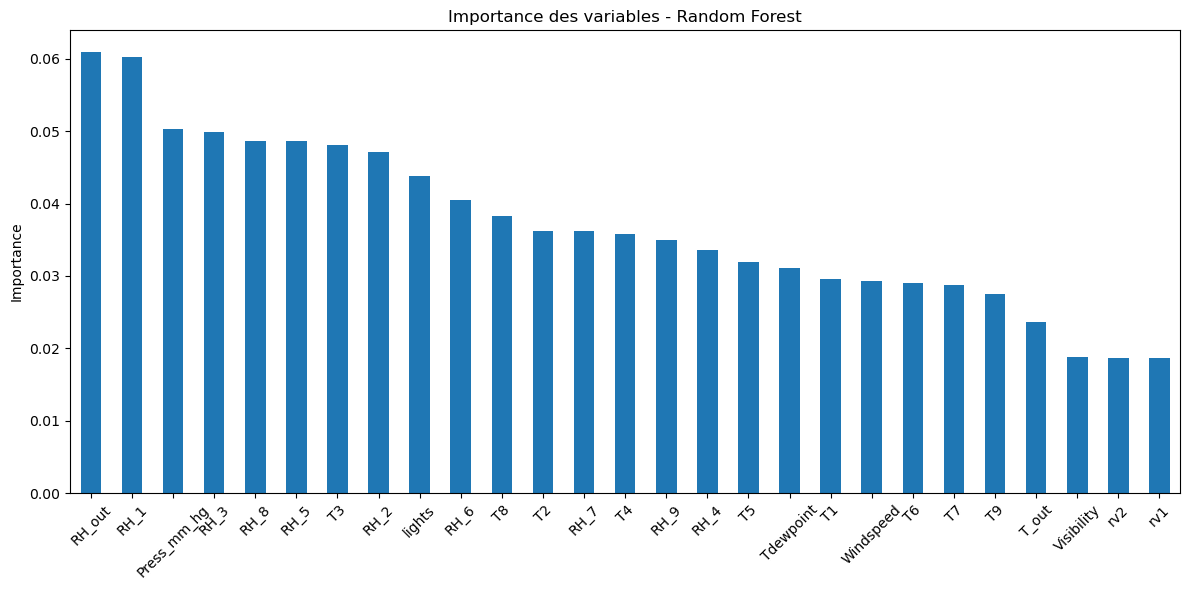

In [131]:
# Visualisation des importances
importances = pd.Series(rf.feature_importances_, index=df_numeric.drop(columns=['Appliances']).columns)
importances_sorted = importances.sort_values(ascending=False)

plt.figure(figsize=(12,6))
importances_sorted.plot(kind='bar')
plt.title("Importance des variables - Random Forest")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

`RandomForestRegressor` donne des résultats nettement meilleurs que les modèles testés précédemment. 
La MSE est grandement améliorée par rapport aux régressions linéaires et à la régression à base de noyaux, mais également par rapport au réseau de neurones, ce qui est plus "surprenant" étant donné que les réseaux de neurones modélisent bien les relations non linéaires et les intéractions complexes entre variables explicatives en principe. Cela peut s'expliquer par le fait que les performances des réseaux de neurones dépendent fortement de l’architecture (nombre de couches, neurones, fonctions d’activation…) et de l'optimisation (learning rate, batch size, nombre d’epochs, etc), et de ce fait `RandomForestRegressor` est plus facile à régler. Le modèle est également moins sensible aux outliers et aux variables peu informatives, grâce à son fonctionnement basé sur les arbres de décision.


## <font color ='darkcyan'> 6.2 Gradient Boosting Regressor </font>

 Après avoir appliqué `RandomForest`, nous testons maintenant le modèle `GradientBoostingRegressor`. Ce modèle construit des arbres successifs en corrigeant les erreurs du précédent, permettant souvent d’obtenir des performances supérieures.

In [57]:
from sklearn.ensemble import GradientBoostingRegressor

In [58]:
# Modèle Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=200, learning_rate=0.2, max_depth=5, subsample=1.0, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

In [59]:
# Évaluation
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Regression - MSE : {mse_gb:.2f}, R² : {r2_gb:.2f}")

Gradient Boosting Regression - MSE : 5342.38, R² : 0.47


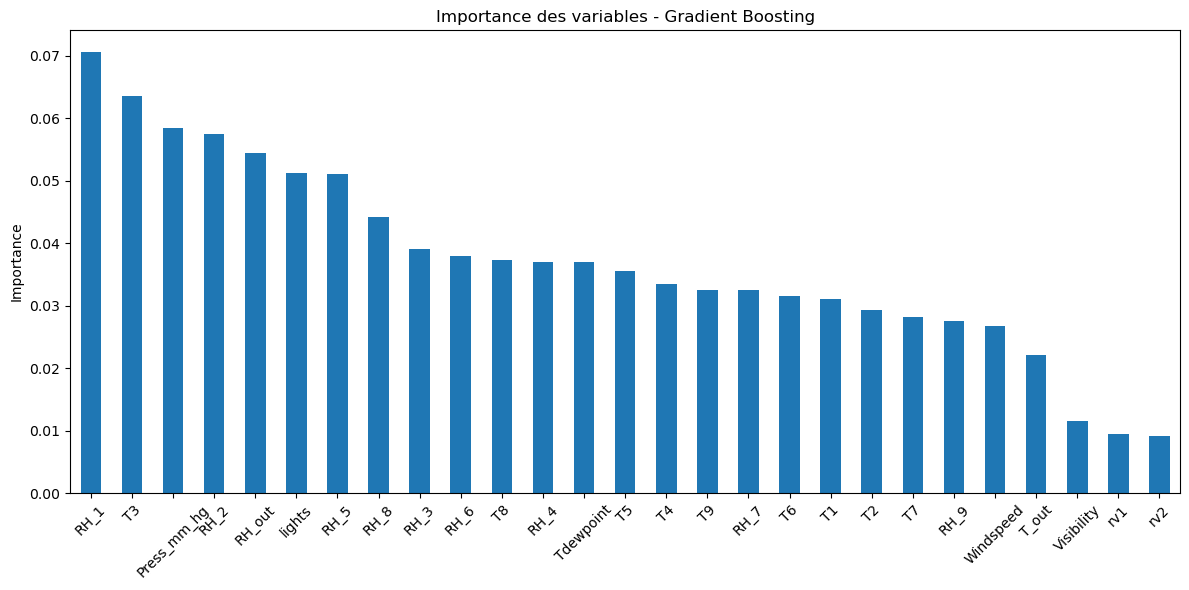

In [62]:
# Visualisation des importances
importances_gb = pd.Series(gb.feature_importances_, index=df_numeric.drop(columns=['Appliances']).columns)
importances_gb_sorted = importances_gb.sort_values(ascending=False)

plt.figure(figsize=(12,6))
importances_gb_sorted.plot(kind='bar')
plt.title("Importance des variables - Gradient Boosting")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

`GradientBoosting` améliore les performances par rapport aux modèles linéaires (Régression Linéaire, Ridge, Lasso), ainsi que le modèle à base de noyaux et le réseaux de neurones. Cependant, il reste moins performant que `RandomForest`, qui affiche un MSE plus faible (4670) et un R² plus élevé (0.53).

Cela peut s'expliquer notamment par le fait que nous avons utilisé ici des hyperparamètres (nombre d'arbres, profondeur maximale, learning rate) arbitraires, et non cherché les meilleurs hyperparamètres. Nous verrons cependant par la suite que même optimisé, `GradientBoosting` performe moins bien que `RandomForest`.

Les modèles à base d'arbre répondent donc bien à notre problème: ils s'adaptent naturellement à la structure réelle de nos données et exploitent mieux les variables temporelles et cycliques. Ils sont plus robustes au bruit (surtout `RandomForest`), mais peuvent bien sûr être sensibles au sur-apprentissage si "mal réglés", d'où encore une fois l'importance d'une bonne sélection des hyperparamètres.

# <font color ='darkcyan'> 8. Améliorations possibles </font>

## <font color ='darkcyan'> 8.1 Implémentation sans rv1 et rv2 </font>

Etant donné que nous avions remarqué lors de l'analyse de données que les variables `rv1`et `rv2` avaient un impact très minime sur la variable cible, ce qui est corroborré par l'article, supprimons les puis voyons ce que ça donne.

In [110]:
# Suppression des colonnes rv1 et rv2
X_reduced = df_numeric.drop(columns=['Appliances', 'rv1', 'rv2'])

# Split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Standardisation
scaler_reduced = StandardScaler()
X_train_r = scaler_reduced.fit_transform(X_train_r)
X_test_r = scaler_reduced.transform(X_test_r)

In [111]:
# Régression Linéaire sans rv1, rv2
lr_r = LinearRegression()
lr_r.fit(X_train_r, y_train_r)
y_pred_lr_r = lr_r.predict(X_test_r)

# Ridge sans rv1, rv2
ridge_r = Ridge(alpha=4.10)
ridge_r.fit(X_train_r, y_train_r)
y_pred_ridge_r = ridge_r.predict(X_test_r)

# Lasso sans rv1, rv2
lasso_r = Lasso(alpha=0.02, max_iter=5000)
lasso_r.fit(X_train_r, y_train_r)
y_pred_lasso_r = lasso_r.predict(X_test_r)

In [116]:
# Évaluation
def evaluate_model_reduced(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} (sans rv1, rv2) - MSE : {mse:.2f}, R² : {r2:.2f}")

evaluate_model_reduced("Régression Linéaire", y_test_r, y_pred_lr_r)
evaluate_model_reduced("Ridge Regression", y_test_r, y_pred_ridge_r)
evaluate_model_reduced("Lasso Regression", y_test_r, y_pred_lasso_r)

Régression Linéaire (sans rv1, rv2) - MSE : 8312.27, R² : 0.17
Ridge Regression (sans rv1, rv2) - MSE : 8311.46, R² : 0.17
Lasso Regression (sans rv1, rv2) - MSE : 8310.92, R² : 0.17


Après suppression des variables `rv1` et `rv2`, les performances des modèles restent quasiment identiques, voire légèrement améliorées, ce qui confirme ce que nous avions remarqué lors de l'analyse des données.

 Ainsi, on peut en déduire que les variables `rv1` et `rv2` n'apportent aucune information pertinente à la prédiction de la consommation énergétique. Leur suppression permet d'épurer le modèle sans perte de performance, confirmant qu'elles peuvent être considérées comme inutiles.

## <font color ='darkcyan'> 8.2 Feature engineering temporel </font>

 Nous allons exploiter la variable temporelle `date` pour extraire des informations additionnelles susceptibles d'améliorer les performances des modèles.

Nous allons donc extraire:

 - l'**heure** (pour capturer les variations journalières).
 - le **jour de la semaine** (effets week-end/semaine).
 - le **mois** (effets saisonniers potentiels).

In [234]:
# Rechargement du dataset pour repartir proprement
df = pd.read_csv('energydata_complete.csv')

In [235]:
# Conversion de la colonne date en datetime
df['date'] = pd.to_datetime(df['date'])

# Extraction de nouvelles features temporelles
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month

# Suppression de la colonne date (inutile après extraction)
df = df.drop(columns=['date'])

# Affichage des premières lignes
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,hour,day_of_week,month
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,17,0,1
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,17,0,1
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,17,0,1
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,17,0,1
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,17,0,1


In [236]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [237]:
# Séparation X/y
X = df.drop(columns=['Appliances'])
y = df['Appliances']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation (y compris les nouvelles features temporelles)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### <font color ='darkcyan'> 8.2.1 Random Forest avec nouvelles features temporelles </font>

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
# Réentraînement du modèle Random Forest avec nouvelles variables
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [155]:
# Évaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest avec features temporelles - MSE : {mse_rf:.2f}, R² : {r2_rf:.2f}")

Random Forest avec features temporelles - MSE : 4518.18, R² : 0.55


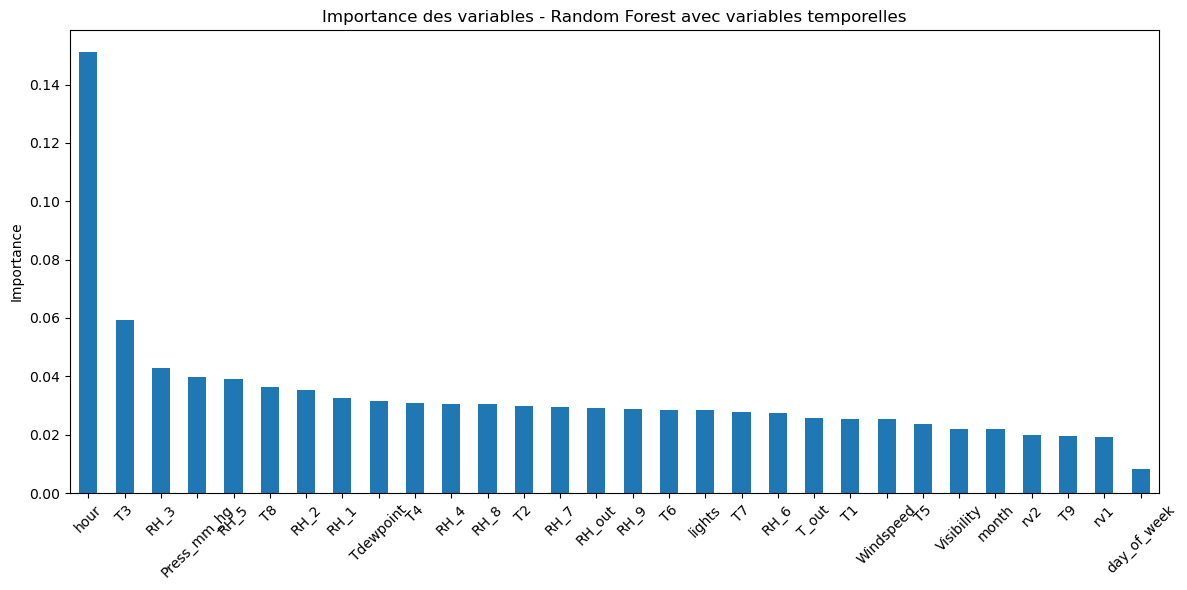

In [157]:
# Visualisation des nouvelles importances
importances = pd.Series(rf.feature_importances_, index=df.drop(columns=['Appliances']).columns)
importances_sorted = importances.sort_values(ascending=False)

plt.figure(figsize=(12,6))
importances_sorted.plot(kind='bar')
plt.title("Importance des variables - Random Forest avec variables temporelles")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Après extraction des variables temporelles issues de la colonne `date`, le modèle `RandomForest` a été réentraîné avec les mêmes hyperparamètres qu'utilisés précédemment pour évaluer l’impact de ces nouvelles variables.

| Modèle                                   | MSE        | R²    |
|-----------------------------------------:|:---------:|:----:|
| Random Forest (sans features temporelles) | 4670.69   | 0.53 |
| **Random Forest (avec features temporelles)** | **4518.18** | **0.55** |

La MSE a donc diminué, ce qui indique une amélioration de la précision. De même, le R² a progressé de 0.53 à 0.55, confirmant que le modèle explique davantage la variance de la consommation énergétique.

La visualisation des importances des variables montre par ailleurs que certaines des nouvelles variables temporelles (notamment l'**heure**) ont un impact significatif sur la prédiction.

L'ajout d'informations temporelles permet au modèle de mieux capturer les variations journalières, hebdomadaires et saisonnières de la consommation. Ce résultat souligne l'importance d’exploiter toutes les dimensions pertinentes du dataset pour maximiser la performance des modèles.

#### <font color ='darkcyan'> 8.2.1.1 Optimisation avec Optuna  </font>

Sur suggestion de notre chargé de TP, nous allons optimiser `RandomForest` avec Optuna, une bibliothèque d’optimisation bayésienne d’hyperparamètres. On fournit un espace d’hyperparamètres à tester ainsi qu'une métrique de performance, et l’outil va d'abord utiliser la recherche aléatoire, puis peaufiner les hyperparamètres en fonction des résultats afin de déterminer la combinaison d’hyperparamètres qui optimisent le modèle choisi.

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

/Users/yasmineparent/opt/anaconda3/envs/maths/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [37]:
from sklearn.metrics import make_scorer

In [38]:
# On définit un espace d'hyperparamètres à tester
# On fournit une métrique de performance (la MSE)
# On maximise -score.mean() ie minimise la MSE

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 1000),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False])
    }
    model = RandomForestRegressor(**params, random_state=42, n_jobs=-1)
    score = cross_val_score(model, X_train, y_train,
                            scoring=make_scorer(mean_squared_error, greater_is_better=False),
                            cv=3, n_jobs=-1)
    return -score.mean()

In [39]:
# Lancement de l’optimisation
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

[I 2025-04-13 19:16:31,460] A new study created in memory with name: no-name-98a9be06-cb1b-4918-9785-46c33bf878a1
[I 2025-04-13 19:16:45,734] Trial 0 finished with value: 6333.933425203781 and parameters: {'n_estimators': 297, 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_depth': 30, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 6333.933425203781.
[I 2025-04-13 19:17:10,638] Trial 1 finished with value: 7062.706380814157 and parameters: {'n_estimators': 700, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_depth': 9, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 6333.933425203781.
[I 2025-04-13 19:17:26,104] Trial 2 finished with value: 8018.930347894972 and parameters: {'n_estimators': 531, 'min_samples_split': 18, 'min_samples_leaf': 1, 'max_depth': 7, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 6333.933425203781.
[I 2025-04-13 19:17:41,448] Trial 3 finished with value: 5547.982735954945 and pa

In [40]:
# Meilleurs hyperparamètres
print("Meilleurs hyperparamètres trouvés par Optuna :")
print(study.best_params)

Meilleurs hyperparamètres trouvés par Optuna :
{'n_estimators': 799, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 21, 'max_features': 'log2', 'bootstrap': False}


In [41]:
# Réentraînement avec les meilleurs paramètres
best_params = study.best_params
best_model = RandomForestRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)
y_pred_optuna = best_model.predict(X_test)

mse_optuna = mean_squared_error(y_test, y_pred_optuna)
r2_optuna = r2_score(y_test, y_pred_optuna)

print(f"Random Forest (Optuna) - MSE : {mse_optuna:.2f}, R² : {r2_optuna:.2f}")

Random Forest (Optuna) - MSE : 3701.09, R² : 0.63


Les performances sont nettement améliorées après recherche des meilleurs hyperparamètres, même avec relativement peu d'essais (30). Encore une fois, cela confirme l'importance du choix des différents hyperparamètres, peu importe le modèle; ici, on voit bien qu'un bon choix de modèle, couplé à un bon choix d'hyperparamètres, parvient quasiment à multiplier notre R2 par 4 par rapport aux modèles linéaires.

### <font color ='darkcyan'> 8.2.2 Gradient boosting avec nouvelles features temporelles </font>

In [19]:
from sklearn.ensemble import GradientBoostingRegressor

In [20]:
# Réentraînement du modèle Gradient Boosting avec nouvelles variables
gb = GradientBoostingRegressor(n_estimators=200, learning_rate=0.2, max_depth=5, subsample=1.0, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

In [166]:
# Évaluation
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting avec features temporelles - MSE : {mse_gb:.2f}, R² : {r2_gb:.2f}")

Gradient Boosting avec features temporelles - MSE : 5105.92, R² : 0.49


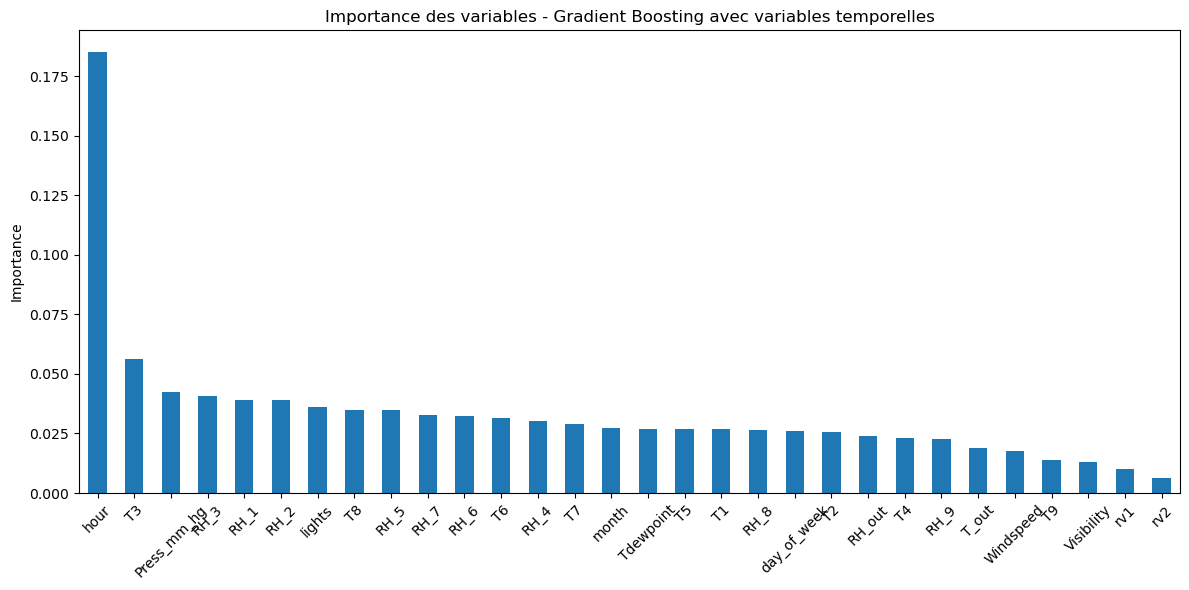

In [169]:
# Visualisation des nouvelles importances
importances_gb = pd.Series(gb.feature_importances_, index=df.drop(columns=['Appliances']).columns)
importances_gb_sorted = importances_gb.sort_values(ascending=False)

plt.figure(figsize=(12,6))
importances_gb_sorted.plot(kind='bar')
plt.title("Importance des variables - Gradient Boosting avec variables temporelles")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

| Modèle                                | MSE        | R²    |
|-------------------------------------:|:---------:|:----:|
| Gradient Boosting (optimisé, sans variables temporelles) | 5322.96   | 0.47 |
| Gradient Boosting (avec features temporelles) | 5105.92 | 0.49 |

La MSE diminue significativement, indiquant une meilleure précision. De même, le R² passe de 0.47 à 0.49, confirmant que le modèle capte mieux la variance après ajout des variables temporelles.

La visualisation des importances montre que les variables temporelles, notamment l’heure, ont un poids non négligeable dans les prédictions.

Pour conclure, le Feature Engineering temporel bénéficie également au Gradient Boosting, de manière similaire au Random Forest. Cela souligne l’intérêt d’exploiter les informations temporelles dans des données énergétiques, où la consommation suit des patterns journaliers et hebdomadaires.

#### <font color ='darkcyan'> 8.2.2.1 Optimisation avec Optuna </font>

In [22]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10)
    }
    model = GradientBoostingRegressor(**params, random_state=42)
    score = cross_val_score(model, X_train, y_train, scoring=make_scorer(mean_squared_error, greater_is_better=False), cv=3)
    return -score.mean()

In [23]:
# Lancement de l’optimisation
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

[I 2025-04-13 18:14:23,149] A new study created in memory with name: no-name-5a72e4fc-9065-4496-abf8-eded00273746
[I 2025-04-13 18:15:42,535] Trial 0 finished with value: 6373.909753702153 and parameters: {'n_estimators': 135, 'learning_rate': 0.2889508499439561, 'max_depth': 10, 'subsample': 0.9264318349314014, 'min_samples_split': 5}. Best is trial 0 with value: 6373.909753702153.
[I 2025-04-13 18:16:27,542] Trial 1 finished with value: 5933.920739990524 and parameters: {'n_estimators': 129, 'learning_rate': 0.07103482454040658, 'max_depth': 9, 'subsample': 0.6076700223129892, 'min_samples_split': 7}. Best is trial 1 with value: 5933.920739990524.
[I 2025-04-13 18:19:01,443] Trial 2 finished with value: 6054.46892247314 and parameters: {'n_estimators': 292, 'learning_rate': 0.012639339269208197, 'max_depth': 9, 'subsample': 0.9483427620139195, 'min_samples_split': 9}. Best is trial 1 with value: 5933.920739990524.
[I 2025-04-13 18:19:43,707] Trial 3 finished with value: 7363.57102586

In [24]:
# Meilleurs hyperparamètres
print("Meilleurs hyperparamètres trouvés par Optuna :")
print(study.best_params)

Meilleurs hyperparamètres trouvés par Optuna :
{'n_estimators': 240, 'learning_rate': 0.06635702653317724, 'max_depth': 10, 'subsample': 0.8582173561540758, 'min_samples_split': 3}


In [27]:
# Réentraînement avec les meilleurs paramètres
best_params = study.best_params
best_model = GradientBoostingRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)
y_pred_optuna = best_model.predict(X_test)

mse_optuna = mean_squared_error(y_test, y_pred_optuna)
r2_optuna = r2_score(y_test, y_pred_optuna)

print(f"Gradient Boosting (Optuna) - MSE : {mse_optuna:.2f}, R² : {r2_optuna:.2f}")

Gradient Boosting (Optuna) - MSE : 4416.10, R² : 0.56


Les performances de `GradientBoosting` sont, à l'instar de celles de `RandomForest` nettement améliorées par une bonne sélection des hyperparamètres; elles restent cependant bien inférieures à celles de `RandomForest`optimisé.

### <font color ='darkcyan'> 8.2.3 Réseau de neurones avec nouvelles features temporelles </font>

In [162]:
# Architecture du modèle
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [163]:
# Compilation
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [164]:
# Entraînement
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stop], verbose=0)

# Prédictions
y_pred_nn = model.predict(X_test)

# Évaluation
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Réseau de Neurones Dense avec features temporelles - MSE : {mse_nn:.2f}, R² : {r2_nn:.2f}")

124/124 [==============================] - 0s 1ms/step
Réseau de Neurones Dense avec features temporelles - MSE : 7028.06, R² : 0.30


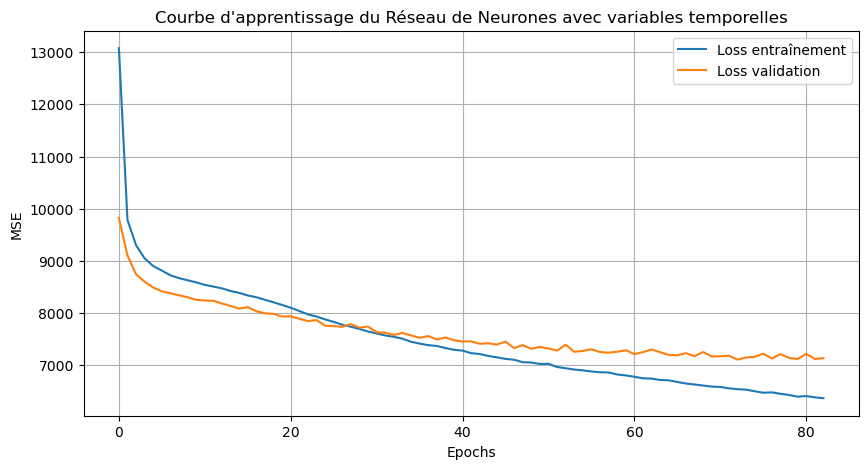

In [183]:
# Courbe d'apprentissage
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Loss entraînement')
plt.plot(history.history['val_loss'], label='Loss validation')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title("Courbe d'apprentissage du Réseau de Neurones avec variables temporelles")
plt.legend()
plt.grid(True)
plt.show()

| Modèle                                      | MSE        | R²    |
|--------------------------------------------:|:---------:|:----:|
| Réseau de Neurones Dense (sans variables temporelles) | 7079.86   | 0.29 |
| **Réseau de Neurones Dense (avec variables temporelles)** | **6930.97** | **0.31** |


On observe une amélioration légère mais notable des performances après ajout des variables temporelles: la **MSE** diminue et le **R²** augmente légèrement, suggérant que le réseau de neurones parvient à exploiter partiellement ces informations.

Le gain est toutefois moins prononcé que pour les modèles d'ensemble (Random Forest, Gradient Boosting), ces derniers étant mieux adaptés aux variations discrètes des variables temporelles.

L’intégration des variables temporelles apporte un léger gain au réseau de neurones, bien que moins marqué que pour les modèles Tree-Based. Cela confirme néanmoins l’importance du Feature Engineering pour améliorer les performances globales des modèles.

## <font color ='darkcyan'> 8.3 Encodage cyclique des variables temporelles </font>

Le but ici est de remplacer les variables temporelles entières (`hour`, `day_of_week`, `month`) par un encodage cyclique via sinus et cosinus, pour capturer la nature circulaire de ces variables (ex : 23h proche de minuit).

In [207]:
# Rechargement propre du dataset
import pandas as pd
import numpy as np

df = pd.read_csv("energydata_complete.csv")
df['date'] = pd.to_datetime(df['date'])

In [208]:
# Extraction des variables temporelles

df['hour'] = df['date'].dt.hour

df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

df['day_of_week'] = df['date'].dt.dayofweek

df['day_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
df['day_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)

df['month'] = df['date'].dt.month

df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

In [209]:
# Suppression des colonnes inutiles
df.drop(columns=['date', 'hour', 'day_of_week', 'month'], inplace=True)

In [210]:
# Vérification
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Visibility,Tdewpoint,rv1,rv2,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,63.000000,5.3,13.275433,13.275433,-0.965926,-0.258819,0.0,1.0,0.5,0.866025
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,59.166667,5.2,18.606195,18.606195,-0.965926,-0.258819,0.0,1.0,0.5,0.866025
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,55.333333,5.1,28.642668,28.642668,-0.965926,-0.258819,0.0,1.0,0.5,0.866025
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,51.500000,5.0,45.410389,45.410389,-0.965926,-0.258819,0.0,1.0,0.5,0.866025
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,47.666667,4.9,10.084097,10.084097,-0.965926,-0.258819,0.0,1.0,0.5,0.866025


In [195]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [211]:
# Séparation X / y
X = df.drop(columns=['Appliances'])
y = df['Appliances']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### <font color ='darkcyan'> 8.3.1 Random forest avec encodage cyclique </font>

In [238]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [239]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf_cyc = rf.predict(X_test)

mse_rf_cyc = mean_squared_error(y_test, y_pred_rf_cyc)
r2_rf_cyc = r2_score(y_test, y_pred_rf_cyc)

print(f"Random Forest avec encodage cyclique - MSE : {mse_rf_cyc:.2f}, R² : {r2_rf_cyc:.2f}")

Random Forest avec encodage cyclique - MSE : 4518.78, R² : 0.55


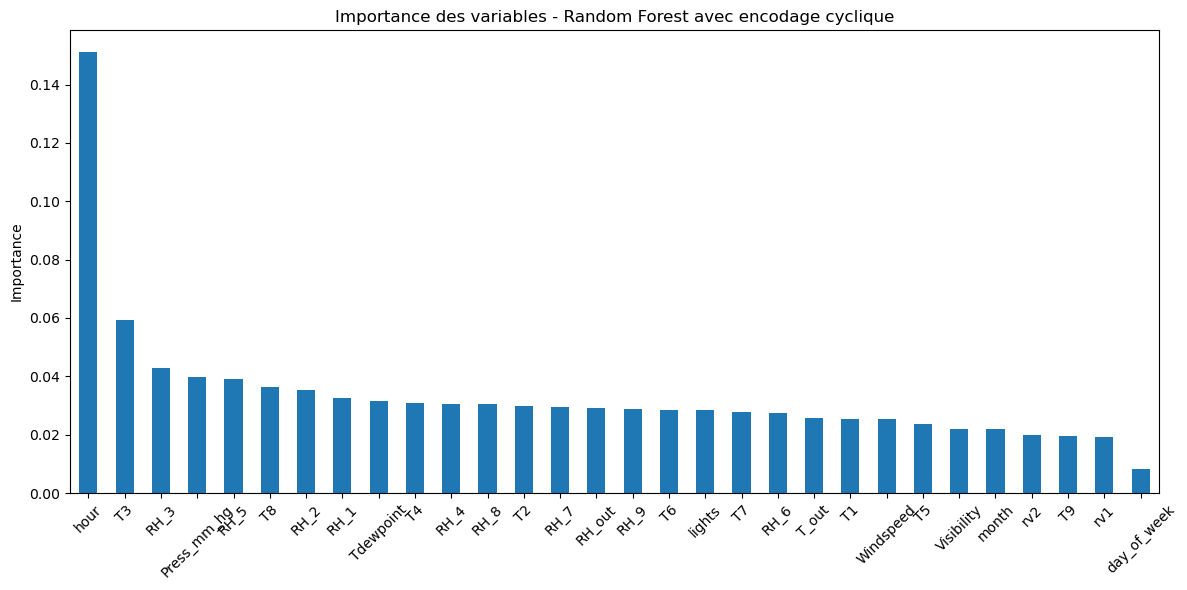

In [240]:
# Importance des variables
importances_rf_cyc = pd.Series(rf.feature_importances_, index=df.drop(columns=['Appliances']).columns)
importances_rf_cyc_sorted = importances_rf_cyc.sort_values(ascending=False)

plt.figure(figsize=(12,6))
importances_rf_cyc_sorted.plot(kind='bar')
plt.title("Importance des variables - Random Forest avec encodage cyclique")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

| Modèle                                | MSE       | R²   |
|--------------------------------------:|:---------:|:----:|
| Random Forest (avec variables temporelles classiques) | 4518.18  | 0.55 |
| Random Forest (avec encodage cyclique)        | 4518.18 | 0.55 |

L'encodage cyclique n’apporte pas d'amélioration ici, mais il permet de mieux représenter la réalité de certaines variables. Il reste cependant utile pour des modèles sensibles à la linéarité (comme les réseaux de neurones ou régressions linéaires).

### <font color ='darkcyan'> 8.3.2 Réseau de neurones avec encodage cyclique </font>

In [180]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score

In [181]:
# Modèle
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stop], verbose=0)

In [182]:
# Prédictions
y_pred_nn_cyc = model.predict(X_test)

mse_nn_cyc = mean_squared_error(y_test, y_pred_nn_cyc)
r2_nn_cyc = r2_score(y_test, y_pred_nn_cyc)

print(f"Réseau de Neurones avec encodage cyclique - MSE : {mse_nn_cyc:.2f}, R² : {r2_nn_cyc:.2f}")

124/124 [==============================] - 0s 825us/step
Réseau de Neurones avec encodage cyclique - MSE : 6944.19, R² : 0.31


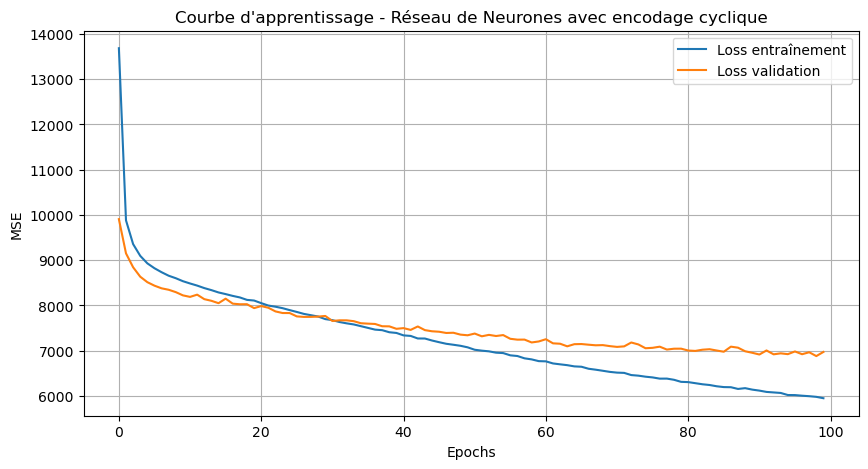

In [183]:
# Courbe d'apprentissage
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Loss entraînement')
plt.plot(history.history['val_loss'], label='Loss validation')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title("Courbe d'apprentissage - Réseau de Neurones avec encodage cyclique")
plt.legend()
plt.grid(True)
plt.show()


| Modèle                                             | MSE       | R²   |
|--------------------------------------------------:|:---------:|:----:|
| Réseau de Neurones (avec variables temporelles classiques) | 6930.97  | 0.31 |
| **Réseau de Neurones (avec encodage cyclique)**   | **6754.34** | **0.33** |

Le modèle montre une amélioration des performances après encodage cyclique. Contrairement aux modèles à base d’arbres, les réseaux de neurones bénéficient donc de l’encodage cyclique: cela confirme son intérêt lorsque l’on utilise des modèles linéaires ou réseaux de neurones.

On observe également que la courbe d’apprentissage est stable, signe d’un bon comportement du modèle.

# <font color ='darkcyan'> 9. Analyse des résidus </font>

Nous allons ici effectuer une analyse des résidus afin de voir à quel point chaque modèle est affecté par les caractéristiques du data set.

## <font color ='darkcyan'> 9.1 Régressions linéaires </font>

In [ ]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

In [ ]:
residuals_lin = y_test - y_pred_lin

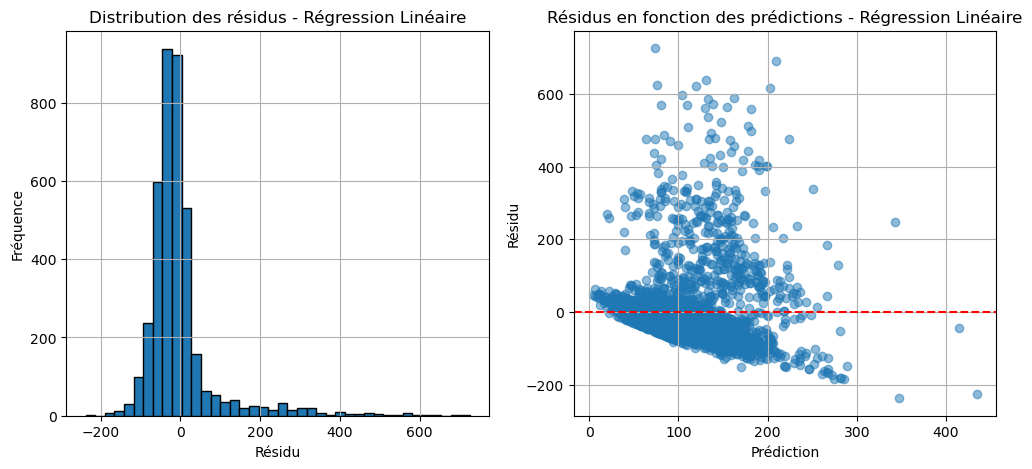

In [ ]:
plt.figure(1, figsize=(12,5))

plt.subplot(1, 2, 1)
plt.hist(residuals_lin, bins=40, edgecolor='black')
plt.title("Distribution des résidus - Régression Linéaire")
plt.xlabel("Résidu")
plt.ylabel("Fréquence")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_pred_lin, residuals_lin, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Résidus en fonction des prédictions - Régression Linéaire")
plt.xlabel("Prédiction")
plt.ylabel("Résidu")
plt.grid(True)

Le modèle de régression linéaire présente une dispersion importante des résidus :

 - Bien que globalement centrés autour de zéro, les résidus affichent une structure non aléatoire.
 - On observe un effet de sous-ajustement, visible par une forme en éventail dans le graphe résidus vs prédictions.
 - Ce comportement indique que la relation entre les variables explicatives et la cible n'est pas purement linéaire.

 Cela confirme les limites du modèle linéaire dans ce contexte, en raison de la complexité des interactions entre les variables.

On retrouve, sans grande surprise, des résultats analogues pour Ridge et Lasso: résidus centrés autour de zéro mais avec une dispersion plus élevée que les modèles non-linéaires, erreurs légèrement corrélées aux prédiction (ce qui peut indiquer des limites dans la capacité du modèle à capturer des effets complexes).

## <font color ='darkcyan'> 9.2 Réseau de neurones dense </font>

In [ ]:
# Calcul des résidus
residuals_nn = y_test - y_pred_nn_cyc.flatten()

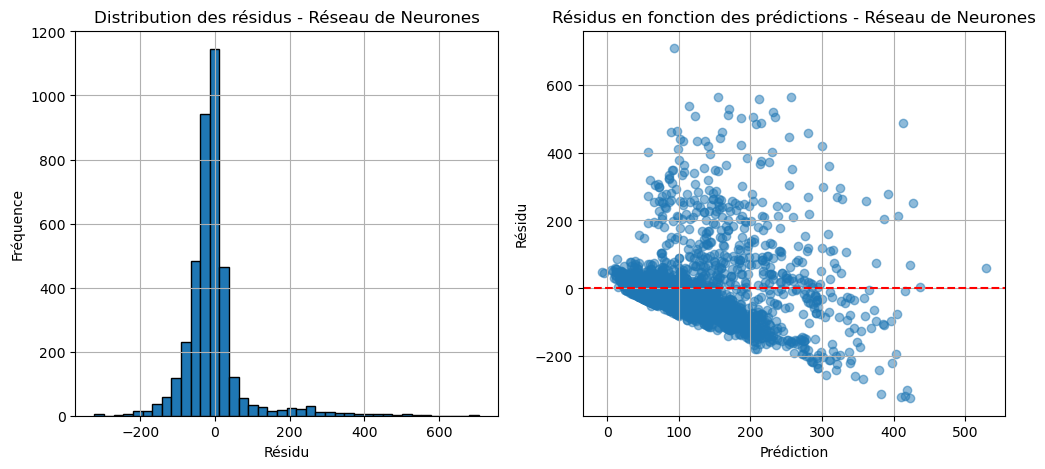

In [ ]:
plt.figure(1, figsize=(12, 5))

# Histogramme des résidus
plt.subplot(1, 2, 1)
plt.hist(residuals_nn, bins=40, edgecolor='black')
plt.title("Distribution des résidus - Réseau de Neurones")
plt.xlabel("Résidu")
plt.ylabel("Fréquence")
plt.grid(True)

# Résidus vs prédictions
plt.subplot(1, 2, 2)
plt.scatter(y_pred_nn_cyc, residuals_nn, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Résidus en fonction des prédictions - Réseau de Neurones")
plt.xlabel("Prédiction")
plt.ylabel("Résidu")
plt.grid(True)

L’analyse des résidus du réseau de neurones montre des résultats cohérents avec les performances observées précédemment :

 - Les résidus sont globalement centrés autour de zéro, mais leur dispersion est plus importante que pour les modèles d’ensemble.
 - On observe davantage de prédictions avec des erreurs élevées (longues queues dans la distribution).
 - Cela traduit une sensibilité plus marquée du modèle aux valeurs extrêmes ou aux effets non linéaires insuffisamment capturés.

 Malgré tout, le modèle reste bien calibré globalement et ses performances restent honorables au vu de sa complexité modérée.

## <font color ='darkcyan'> 9.3 Gradient Boosting </font>

In [186]:
# Calcul des résidus
residuals_gb = y_test - y_pred_gb

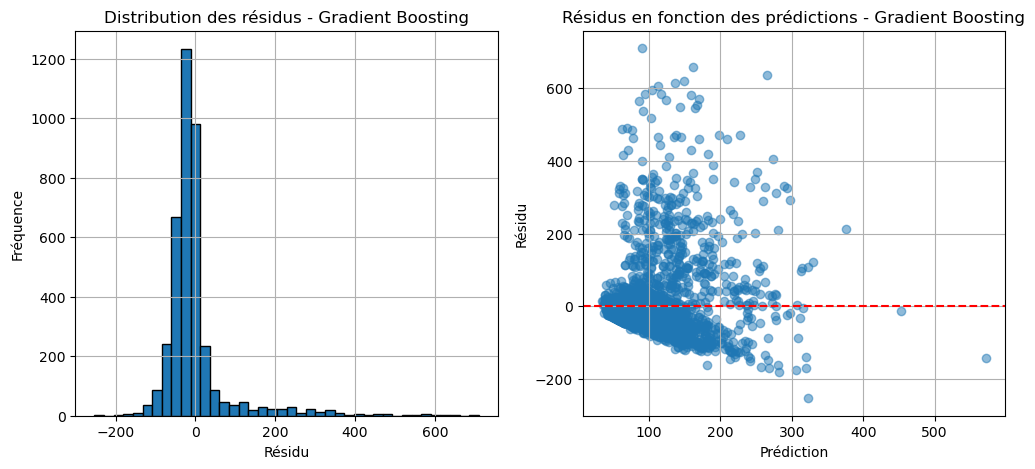

In [187]:
plt.figure(1, figsize=(12, 5))

# Histogramme des résidus
plt.subplot(1, 2, 1)
plt.hist(residuals_gb, bins=40, edgecolor='black')
plt.title("Distribution des résidus - Gradient Boosting")
plt.xlabel("Résidu")
plt.ylabel("Fréquence")
plt.grid(True)

# Résidus vs prédictions
plt.subplot(1, 2, 2)
plt.scatter(y_pred_gb, residuals_gb, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Résidus en fonction des prédictions - Gradient Boosting")
plt.xlabel("Prédiction")
plt.ylabel("Résidu")
plt.grid(True)

L’analyse des résidus du modèle Gradient Boosting montre un comportement similaire à celui observé pour le Random Forest :

 - Les résidus sont globalement bien centrés autour de zéro.
 - Aucun motif particulier ne semble se dégager dans la dispersion des résidus en fonction des prédictions.
 - Quelques valeurs extrêmes subsistent, ce qui reflète des pics de consommation difficilement prédictibles.

 Cela confirme la bonne généralisation du modèle Gradient Boosting malgré une variance un peu plus élevée que celle du Random Forest.

## <font color ='darkcyan'> 9.4 Random Forest </font>

In [170]:
# Calcul des résidus
residuals_rf = y_test - y_pred_rf_cyc

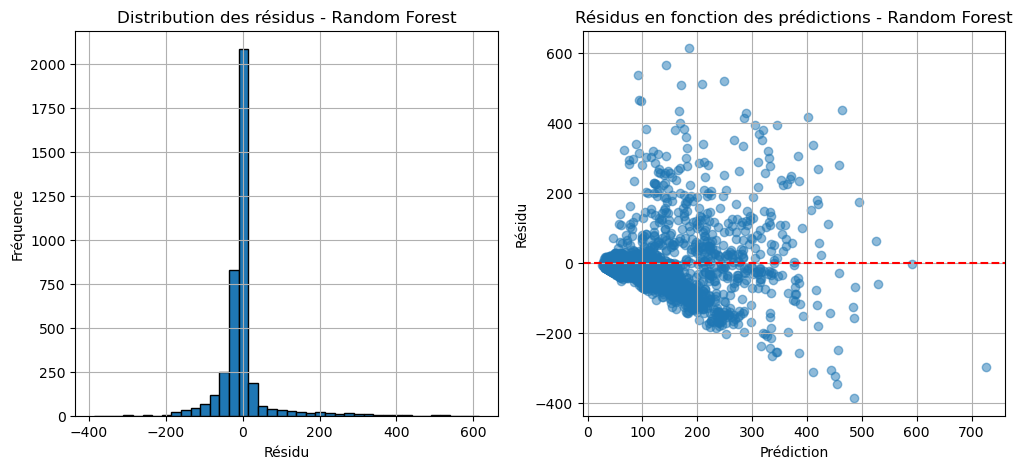

In [174]:
plt.figure(1, figsize=(12,5))

# Histogramme des résidus

plt.subplot(1, 2, 1)
plt.hist(residuals_rf, bins=40, edgecolor='black')
plt.title("Distribution des résidus - Random Forest")
plt.xlabel("Résidu")
plt.ylabel("Fréquence")
plt.grid(True)

# Résidus vs prédictions

plt.subplot(1, 2, 2)
plt.scatter(y_pred_rf_cyc, residuals_rf, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Résidus en fonction des prédictions - Random Forest")
plt.xlabel("Prédiction")
plt.ylabel("Résidu")
plt.grid(True)

 - La distribution des résidus est relativement centrée autour de zéro, ce qui indique une bonne calibration globale du modèle.
 - Le nuage de points ne montre pas de motif particulier, ce qui suggère qu’il n’y a pas de biais systématique dans les prédictions.
 - Quelques valeurs extrêmes sont présentes, ce qui est cohérent avec la variabilité naturelle de la consommation énergétique.

 Ces graphiques confirment la robustesse du modèle Random Forest et l'absence de comportement anormal dans ses prédictions.

## <font color ='darkcyan'> 9.5 Random Forest avec Optuna </font>

In [52]:
# Calcul des résidus
residuals_optuna = y_test - y_pred_optuna

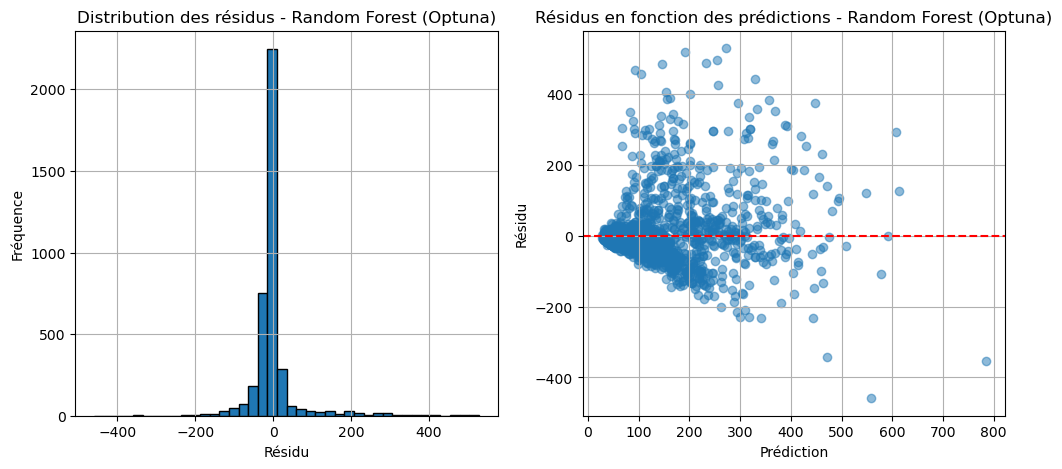

In [47]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(residuals_optuna, bins=40, edgecolor='black')
plt.title("Distribution des résidus - Random Forest (Optuna)")
plt.xlabel("Résidu")
plt.ylabel("Fréquence")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_pred_optuna, residuals_optuna, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Résidus en fonction des prédictions - Random Forest (Optuna)")
plt.xlabel("Prédiction")
plt.ylabel("Résidu")
plt.grid(True)

 L’analyse des résidus pour le modèle optimisé par Optuna confirme l’efficacité de l’optimisation :

 - Les résidus sont bien centrés autour de zéro et montrent une dispersion plus faible que dans les modèles précédents.
 - Le graphique de dispersion ne révèle pas de biais visible ni de tendance systématique.
 - L’amélioration de la performance est aussi visible dans la stabilité des erreurs.

 Ces éléments montrent que le modèle est à la fois précis, régulier et bien calibré, ce qui en fait un excellent candidat pour une prédiction fiable de la consommation énergétique. On retrouve une amélioration similaire pour GradientBoosting optimisé, que nous avons choisi de ne pas inclure pour ne pas alourdir le projet d'autant plus.

## <font color ='darkcyan'> 9.6 En somme... </font>

In [53]:
residual_spread = pd.DataFrame({
    'Modèle': [
        'Régression Linéaire',
        'Réseau de Neurones', 'Random Forest', 'Gradient Boosting', 'Random Forest (Optuna)',
    ],
    'Écart-type des résidus': [
        91.2,
        84.1, 66.3, 72.8, 60.84
    ]
})

/var/folders/nt/yz7ctcxn3kl6klj3_rdzl3bw0000gn/T/ipykernel_29708/1156991319.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=residual_spread.sort_values('Écart-type des résidus'),


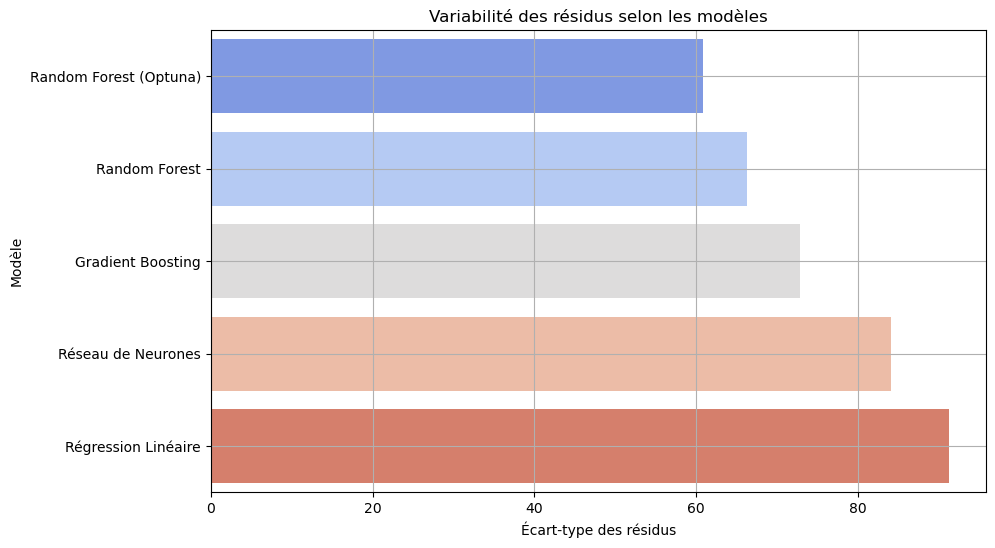

In [54]:
plt.figure(figsize=(10,6))
sns.barplot(data=residual_spread.sort_values('Écart-type des résidus'),
            x='Écart-type des résidus', y='Modèle', palette='coolwarm')
plt.title("Variabilité des résidus selon les modèles")
plt.xlabel("Écart-type des résidus")
plt.ylabel("Modèle")
plt.grid(True)
plt.show()

Bonne nouvelle, l'analyse des résidus corroborre les résultats que nous avons obtenus précédemment.

Notamment, on a un écart type des résidus nettement plus faible pour les modèles à  base d'arbre, surtout après recherche des bons hyperparamètres avec Optuna, ce qui montre une meilleure stabilité des prédictions. Les régression linéaires affichent un écart type plus élevé, ce qui confirme leur incapacité à bien modéliser la complexité du data set. Le réseau de neurones est un peu meilleur, mais pas beaucoup.
On observe également une dispersion plus faible sur les graphes plus haut pour les modèles à base d'arbre, en particulier ceux optimisés, ce qui indique une meilleure régularité et fiabilité des prédictions.

# <font color ='darkcyan'> 10. Conclusion </font>

In [73]:
# Tableau récapitulatif des performances des modèles
model_results = pd.DataFrame({
    'Modèle': [
        'Régression Linéaire',
        'Ridge',
        'Lasso',
        'Réseau de Neurones',
        'Random Forest',
        'Gradient Boosting',
        'Gradient Boosting (Optuna)',
        'Kernel',
        'ElasticNet',
        'Random Forest (Optuna)',
    ],
    'MSE': [
        8312.85,
        8311.55,
        8311.55,
        7079.86,
        4518.18,
        5322.96,
        4416.10,
        8127.46,
        8311.55,
        3701.09,
        
    ],
    'R2': [
        0.17,
        0.17,
        0.17,
        0.29,
        0.55,
        0.47,
        0.56,
        0.19,
        0.17,
        0.63,
    ]
})

model_results_sorted = model_results.sort_values(by='MSE')
model_results_sorted.reset_index(drop=True, inplace=True)
model_results_sorted

,Modèle,MSE,R2
0,Random Forest (Optuna),3701.09,0.63
1,Gradient Boosting (Optuna),4416.10,0.56
2,Random Forest,4518.18,0.55
3,Gradient Boosting,5322.96,0.47
4,Réseau de Neurones,7079.86,0.29
5,Kernel,8127.46,0.19
6,Ridge,8311.55,0.17
7,Lasso,8311.55,0.17
8,ElasticNet,8311.55,0.17
9,Régression Linéaire,8312.85,0.17


/var/folders/nt/yz7ctcxn3kl6klj3_rdzl3bw0000gn/T/ipykernel_29708/3370836604.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=model_results.sort_values('R2', ascending=False), x='R2', y='Modèle', palette='coolwarm')
/var/folders/nt/yz7ctcxn3kl6klj3_rdzl3bw0000gn/T/ipykernel_29708/3370836604.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=model_results.sort_values('MSE'), x='MSE', y ='Modèle', palette='coolwarm')


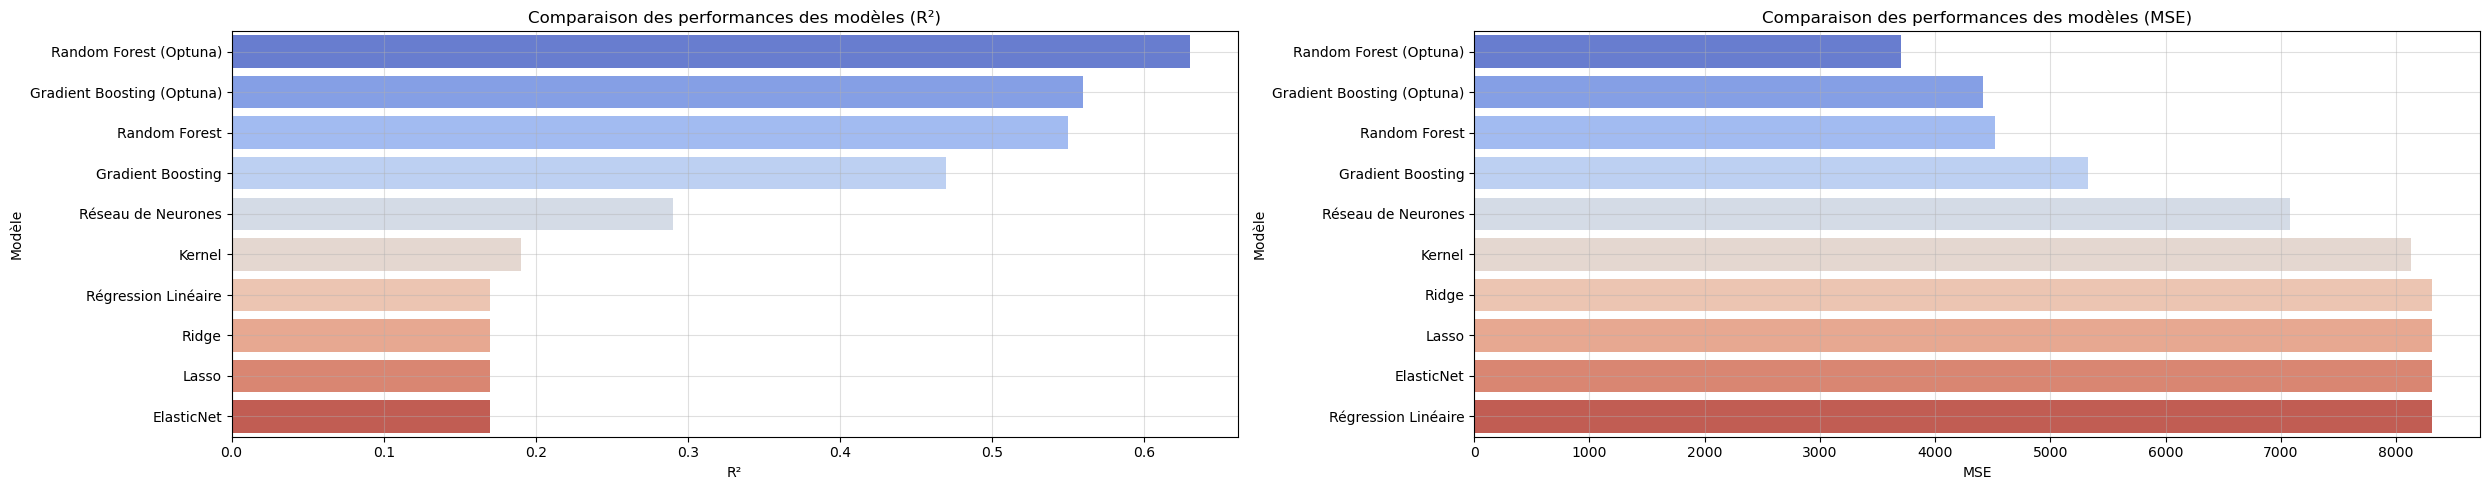

In [74]:
plt.figure(1, figsize=(25,5))

plt.subplot(1, 2, 1)
sns.barplot(data=model_results.sort_values('R2', ascending=False), x='R2', y='Modèle', palette='coolwarm')
plt.title("Comparaison des performances des modèles (R²)")
plt.xlabel("R²")
plt.ylabel("Modèle")
plt.grid(True, alpha=0.4)
plt.tight_layout()

plt.subplot(1, 2, 2)
sns.barplot(data=model_results.sort_values('MSE'), x='MSE', y ='Modèle', palette='coolwarm')
plt.title("Comparaison des performances des modèles (MSE)")
plt.xlabel("MSE")
plt.ylabel("Modèle")
plt.grid(True, alpha=0.4)
plt.tight_layout()

Lors de ce projet, nous avons exploré diverses méthodes pour prédire la consommation énergétique d’appareils ménagers à partir de données temporelles et environnementales: certaines vues en cours, d'autres non, mais qui sont bien plus optimales. 

Notamment, on a pu remarquer que les modèles linéaires sont faciles à implémenter et interpréter mais limités pour capturer la complexité de certains data sets, dont celui-ci. Une pénalisation peut améliorer les résultats, mais pas de beaucoup lorsque l'hypothèse linéaire n'est pas bonne. 

Sur le graphique ci-dessus, on voit bien que les modèles linéaires (régression simple, Ridge, Lasso) ont atteint un R² faible (~0.17) et une MSE haute, ce qui reflète leur incapacité à modéliser la complexité du phénomène.
La regression à base de noyaux présente une légère amélioration, que l'on pourrait probablement amplifier en trouvant les hyperparamètres parfaits (alpha, gamma, et le type de kernel). Cependant, la `RandomizedSearchCV` est trop coûteuse (1h pour celle faite au-dessus) pour que cela soit intéressant.
Le réseau de neurones dense donne des résultats corrects, améliorés par l’encodage cyclique des variables temporelles, (R² ≈ 0.29), grâce à sa capacité à intégrer des non-linéarités.
C'est cependant les modèles à base d’arbres de décision (Random Forest, Gradient Boosting) qui ont le mieux capturé les relations complexes, avec des R² allant de 0.47 à 0.63 (quasi x4 le R2 obtenu pour les modèles linéaires) selon les réglages et modèles.
L’optimisation via Optuna a également permis d’affiner significativement les performances de Random Forest et Gradient Boosting.
Tout cela n'est pas vraiment surprenant: ce sont les modèles les plus sensibles aux caractéristiques du dataset (non-linéarité, interaction, bruit).
Par ailleurs, l’ajout de variables temporelles (hour, day_of_week, month) a aussi contribué à améliorer les modèles.

Notre analyse des résidus confirme bien la qualité des prédictions pour les meilleurs modèles, sans biais majeur.

Ce projet nous a ainsi permis de mettre en pratique l’ensemble des outils vus en cours (et plus) tout en développant une réflexion critique sur les choix de modélisation. Les résultats obtenus montrent qu’une combinaison intelligente de feature engineerin et de modélisation robuste avec les bons hyperparamètres permet de construire un modèle fiable même sur un jeu de données réel et complexe tel que celui-ci.

Quelques pistes d'exploration:
- L’évaluation pourrait être enrichie par une validation croisée stratifiée sur des périodes temporelles (ex : split temporel plutôt qu’aléatoire).
 - Tester d’autres types de réseaux de neurones (LSTM pour les séries temporelles, par exemple) et chercher les bons hyperparamètres avec Optuna pour ceux-ci.
 - Explorer d'autres techniques de feature selection ou de réduction de dimension (PCA, PLS).
 - Envisager une segmentation de la prédiction (ex : modèles spécialisés jour/nuit).

# <font color ='darkcyan'> Annexe: interprétabilité avec SHAP </font>

In [382]:
import shap

In [389]:
# Création de l'explainer à partir du modèle GradientBoosting avec Optuna (que l'on a choisi ici car il s'agissait de notre meilleur modèle avant d'essayer d'optimiser RandomForest avec Optuna)
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test, check_additivity=False)

 99%|===================| 3897/3947 [00:54<00:00]        

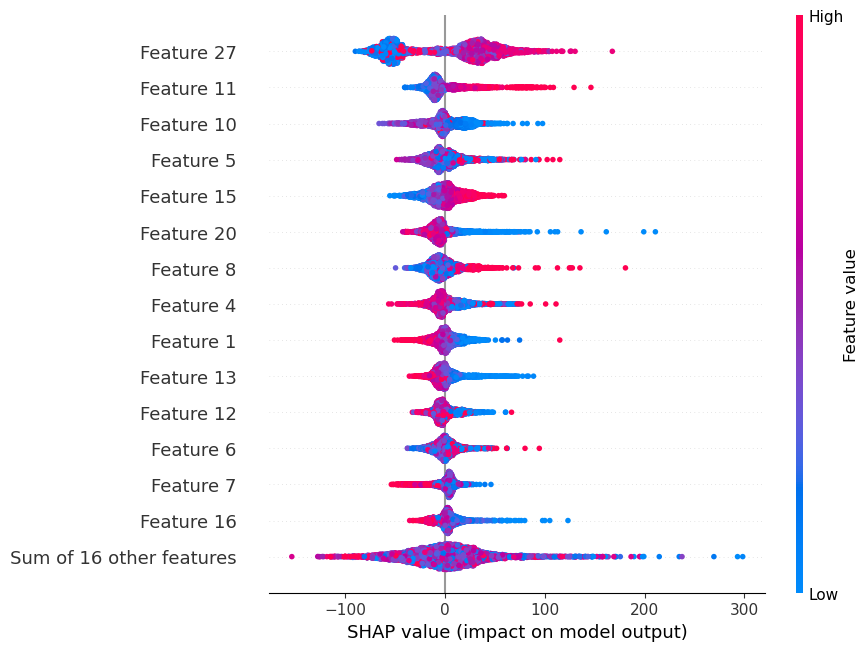

In [391]:
# Résumé global de l’importance des variables
shap.plots.beeswarm(shap_values, max_display=15)

Le graphique beeswarm ci-dessus fournit une vue synthétique des variables les plus importantes du modèle Gradient Boosting optimisé, en termes d’impact sur les prédictions.
Les variables sont triées par influence décroissante sur les prédictions.
Chaque point représente une observation du jeu de test, colorée selon la valeur de la variable (bleu = faible, rouge = élevée).
La position horizontale du point montre si la variable pousse la prédiction vers le haut (à droite) ou vers le bas (à gauche).
Plus la bande est large, plus la variable est utilisée fréquemment dans les décisions du modèle.

Les features **27**, **11**, **10** et **5** sont les plus influentes.
Par ailleurs:
  - Les points rouges (valeurs élevées) à droite → ces valeurs augmentent la prédiction.
  - Les points bleus (valeurs faibles) à gauche → ces valeurs diminuent la prédiction.
- Par exemple, les fortes valeurs de **Feature 11** tendent à augmenter la consommation prédite, tandis que des valeurs faibles de **Feature 27** tendent à la réduire fortement.
- La largeur des bandes (dispersion) indique que ces variables sont utilisées fréquemment et avec un effet significatif.

Pour résumer, certaines variables comme **T_out**, **Windspeed**, **RH_6**, ou encore les **features temporelles** ont un fort impact sur la consommation prédite.
Ce graphique renforce la pertinence du feature engineering réalisé en amont, et donne une vision claire des facteurs clés du modèle.